In [1]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [2]:
# LOADING GRID FILE AND VARIABLES
!pwd
grid_file = '../DATA/grille.nc' 
print 'file exist:', os.path.isfile(grid_file)

f = Dataset(grid_file) # open netcdf
# extracting variables
lon_t = f.variables['longitude_t'][:] # extracting lon data
lat_t = f.variables['latitude_t'][:] # extracting lat data
depth_t = f.variables['depth_t'][:]
dxdy = f.variables['dxdy_t'][:]
dz = f.variables['dz_t'][:]
mask = f.variables['mask_t'][:]
bathy = f.variables['h_w'][:]
print 'Bathy :', np.shape(bathy), 'max :', np.max(bathy), 'min :', np.min(bathy)

f.close()

new_bath = np.ma.masked_where(bathy<200, bathy)
new_bath2 = np.ma.masked_where(lon_t<-5.5, new_bath)
#region_list = ['NWE', 'SWE', 'ION', 'LEV'] #

/home/dosa/MON_ENV_PYTHON/ARTICLE_IAV
file exist: True
Bathy : (160, 394) max : 5054.49 min : 20.5226


In [3]:
# test #
test = bathy
test[test<=200] = 0
test[test>200] = np.nan
test[lon_t<-5.5] = np.nan
test[(lat_t>40) & (lon_t>26.9)] = np.nan

In [4]:
var_phy = ['mld', 'si', 'eke', 'nit_sw']

correl_1 = './LAST_OUTPUT_APR2019/IAV_2011.nc'
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_phy:
    vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
    vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:]# extracting data
f.close()

#np.shape(stand_IAV_zwind) # (160, 394) seems ok!
        
print 'END of CELL'

file exist: True
END of CELL


In [5]:
var_phy = ['exp_poc200', 'exp_doc200']

correl_1 = './LAST_OUTPUT_APR2019/IAV_2011.nc'
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_phy:
    #vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
    vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:]# extracting data
f.close()

var_phy = ['export_poc200', 'export_doc200']
f = Dataset(correl_1) # open netcdf
for phyvar in var_phy:
    vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
    #vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:]# extracting data
f.close()
        
print 'END of CELL'

file exist: True
END of CELL


In [6]:
# Nuts
var_nut = ['nit_int150', 'UptNitsurf', 'UptNitint', 'nit_sw', 'nit_iw', 'UptAmmoSur', 'UptAmmoint',
          'pho_int150', 'UptPsurf'] # 'nit_int200', 'pho_int200',

correl_1 = './LAST_OUTPUT_APR2019/IAV_2011.nc'
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_nut:
    vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:]# extracting data
    if phyvar == 'UptAmmoSur':
        vars()['std_'+phyvar] = f.variables['std_'+phyvar+'f'][0,:,:] # extracting data
    else:
        vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:]# extracting data
f.close()
        
print 'END of CELL'

file exist: True
END of CELL


In [7]:
# Bio
var_bio = ['chl_tot', 'chl_int150', 'chlsurf', 'phyto', 'ppb', 'netppb', 'bactc', 'zoo', 'ncp', 'resp']

correl_1 = './LAST_OUTPUT_APR2019/IAV_2011.nc'
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_bio:
    if phyvar == 'ncp':
        vars()['std_'+phyvar] = f.variables['std_ppb_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
        
    elif phyvar == 'phyto':
        vars()['std_'+phyvar] = f.variables['std_stock_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
    elif phyvar == 'zoo':
        vars()['std_'+phyvar] = f.variables['std_stock_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
    elif phyvar == 'chl_tot':
        vars()['std_'+phyvar] = f.variables['std_stock_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
    elif phyvar == 'bactc':
        vars()['std_'+phyvar] = f.variables['std_stock_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
        
    else:
        vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
        
f.close()

# Bio
var_bio = ['graz', 'grazh', 'grazp']

f = Dataset(correl_1) # open netcdf
for phyvar in var_bio:
    vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
    vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data

f.close()
        
print 'END of CELL'

file exist: True
END of CELL


In [8]:
# 18/03 TEST BIO live
## Création des arrays en lisant moyenne annuelles
file_path = "./LAST_OUTPUT_APR2019/"

var_list = ['chl_tot', 'diac', 'nanoc', 'synec', 'bactc', 'zoomesoc', 'zoomicroc', 'zoonanoc']

year_list = np.arange(1970,2012)
c = 0

for var in var_list:
    vars()['stock_'+var] = np.zeros([len(year_list), 160, 394])
    vars()['stock_'+var][:] = np.nan

for year in year_list:
    print year
    f = Dataset(file_path+str(year)+'.nc')
    
    for var in var_list:
        temp_arr = f.variables[var][0,:,:,:] # extracting data
        #print 'np.shape(temp_arr):', np.shape(temp_arr)
        stock_arr = np.zeros([160, 394])
        stock_arr[:] = np.nan
        
        for i in np.arange(0,160):
            for j in np.arange(0,394):
                if np.ma.is_masked(new_bath2[i,j])==False: # pour éviter calculs inutiles
                    for k in np.arange(0,43):
                        #if np.ma.is_masked(dz[k,i,j])==False:
                        temp_prod = np.nanprod([temp_arr[k,i,j],dz[k,i,j]])
                        #stock_arr[i,j] = np.nansum(stock_arr[i,j],np.nanprod([temp_arr[k,i,j],dz[k,i,j]]))
                        stock_arr[i,j] = np.nansum([stock_arr[i,j],temp_prod])
        
        vars()['stock_'+var][c,:,:] = stock_arr         
        temp_arr = []
        
    f.close()
                
    c += 1

print 'END Stock COMPUTING'

1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
END Stock COMPUTING


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [9]:
# TEST to create a shifted diverging colormap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = mpl.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

test_cm2 = shiftedColorMap(plt.cm.RdBu_r,midpoint=0.16667)

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in less


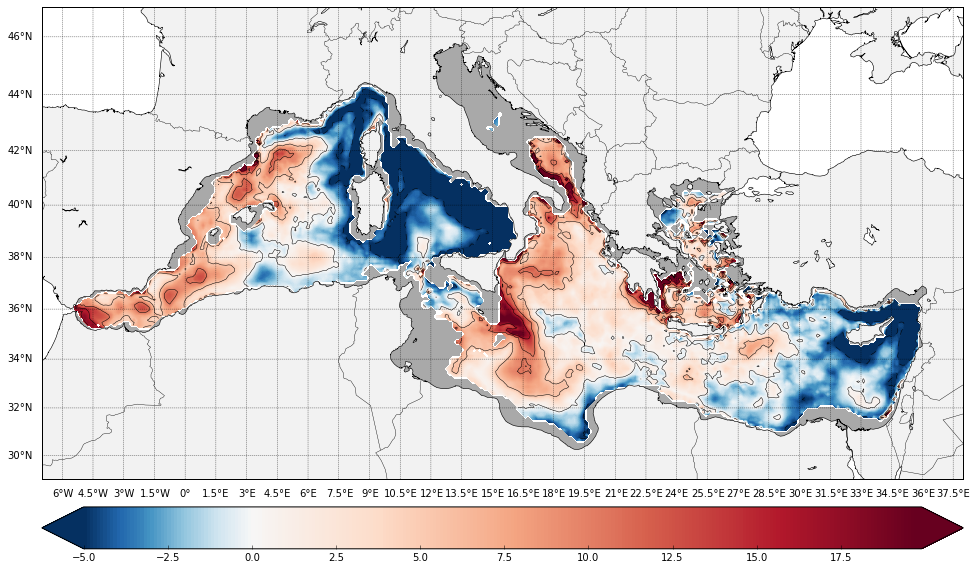

In [10]:
# SUM - PHYS
# 16.04 Deleting nit_sw (explaining process)

#plt.figure(figsize=(25,9));
c = 1
data_to_plot = np.zeros([160,394])
#data_to_plot[:] = np.nan

var_phy = ['nit_int150', 
           'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 
           'zoo', 'graz', 'exp_poc200', 'exp_doc200', 'resp']

#var_phy = ['nit_sw', 'nit_int150',  'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 'exp_doc200']
# change pas grand chose

for phyvar in var_phy:
    
        # Creating corresponding variable names
    temp = vars()['stand_IAV_'+phyvar]
    temp = np.ma.masked_where(bathy<200,temp)
    temp = np.ma.masked_where(lon_t<-5.5,temp)
    
    data_to_plot = data_to_plot+temp

test_cm4 = shiftedColorMap(plt.cm.RdBu_r,midpoint=0.2)

fig = plt.figure(figsize=(16,16));
x1,x2,y1,y2 = -7, 38, 29, 47;
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,2);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

# doing a map # Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-5,20,0.1);
levels2 = np.arange(-5,20,5);
levels_bathy = [200] ;
m.contourf(xd,yd,test,cmap=plt.cm.Greys);
CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
cs = m.contourf(xd,yd,data_to_plot,cmap=test_cm4,levels=levels,extend ='both');# binary / jet ,levels=levels
cs_c = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.5,colors='k');
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

#plt.savefig('/home/dosa/THESE/CR_reunions/APR2019_FIGS/STD_VAR_STAND_IAV/SUM_MINUS_PHYS_NITSW.png',bbox_inches='tight',format='png')

In [11]:
## ?? A garder ?? ## 14.04 " en fait juste moyen de faire une sauvegarde
sum_corr = data_to_plot

In [13]:
# 14/05 correction erreur tot_+region
# 13/05 NEW VERIFS => ici on a contribs negatives et positives (contrairement precedemment)

# 16.04 -nit_sw ; Reorganizing regions
# Pourcentages +/- sur le positif, et figure
# 15.04 ALL CONTRIBUTIONS => REGIONAL MEANS
# Demarche en moy v2 - shorter output

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp']
region_list_old_young = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'S_LEV', 'N_LEV', 'N_ION', 'ADR', 'GOL']

for phyvar in var_phy:
    vars()['contribs_'+phyvar] = np.zeros([len(region_list_old_young)])
i = 0

## 14.04 Regionalisation
for region in region_list_old_young:
    print "Region", region, ":"
    #print ' '
    for phyvar in var_phy:
        # Creating corresponding variable names
        temp = vars()['stand_IAV_'+phyvar]
        temp = np.ma.masked_where(bathy<200,temp)
        temp = np.ma.masked_where(lon_t<-5.5,temp)
    
        # Defining the coordinates
        if region == 'GOL':
            y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                    41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                    39.247095, 46.4938123, 44.4124705]
            x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                    9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                    -1.17747, 5.2446879, 10.1001797]
            curr_col = 'k'
        elif region == 'ALB_ALG':
            y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
            x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9.90934876, 3.994854]
            curr_col = 'k'
        elif region == 'TYR':
            y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                    39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                    41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
            x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                    16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                    9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
            curr_col = 'k'
        elif region == 'CMED':
            y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
            x = [8.92564455, 9.90934876, 10, 15, 15, 13.3111744311976]
        elif region == 'ADR':
            y = [40.138887,39.746050,43,43]
            x = [20.052826,21.936077,21.936077,12]
            curr_col = 'k'
        elif region == 'N_ION':
            y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                    40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
            x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                    16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
            curr_col = 'k'
        elif region == 'S_ION':
            y = [37,29.658354,30.941890,31.924008, #37.503355
                    37.001816]
            x = [21.936077,20.090485,15.297679,15.081913,15.084801]
            curr_col = 'k'
        elif region == 'N_LEV':
            y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 33.8, 33.5, 33.6, 34.5]
            x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 30, 25.5, 22.5, 21.2]
            curr_col = 'k'
        elif region == 'S_LEV':
            y = [34.5,33.6,33.5,33.8,37.180585,30.329515,29.658354]
            x = [21.2,22.5,25.5,30,37.441401,35.238352,20.090485]
        else:
            print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

        # Selecting the data
        vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
        path = Path(vertices, codes=None, closed=True);
        indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                        transform=None, radius=0.0)
        indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone

        # doing a map
        data_to_plot = np.ma.masked_where(bathy<200,temp)
        data_to_plot = np.ma.masked_where(sum_corr<0,data_to_plot)
        data_to_plot = np.ma.masked_array(data_to_plot,indices_re==False)
        vars()[phyvar+'_'+region] = data_to_plot
        
        vars()['tot_'+region] = 0
        
    for phyvar in var_phy:
        if np.nanmean(vars()[phyvar+'_'+region])>0:
            vars()['tot_'+region] = vars()['tot_'+region] + np.nanmean(vars()[phyvar+'_'+region])
    
    for phyvar in var_phy:
        #i = 0
        #vars()['contribs_'+phyvar] = np.zeros([len(var_phy)])
        #if np.nanmean(vars()[phyvar+'_'+region])>0:
            #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_+region'])*100
            #print "contrib", phyvar, "=", vars()['contrib_'+phyvar+'_'+region], "%"
            
        #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/np.nanmean(vars()['correl_'+region]))*100
        vars()['contribs_'+phyvar][i] = np.round((np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_'+region])*100, decimals=2)
        print phyvar, "=", np.round(vars()['contribs_'+phyvar][i],decimals=2), "%"
    i += 1
    
    #print ' '
    #print '---'
    print ' '

Region ALB_ALG :
nit_int150 = 14.56 %
phyto = -8.51 %
netppb = 12.68 %
UptNitsurf = 12.08 %
UptAmmoSur = 1.73 %
bactc = -1.66 %
zoo = 11.65 %
graz = 23.43 %
exp_poc200 = -4.44 %
exp_doc200 = -2.75 %
resp = 23.86 %
 
Region TYR :
nit_int150 = 24.9 %
phyto = -4.84 %
netppb = -0.17 %
UptNitsurf = -0.69 %
UptAmmoSur = -21.87 %
bactc = 3.09 %
zoo = 37.12 %
graz = 14.1 %
exp_poc200 = -0.52 %
exp_doc200 = -2.92 %
resp = 20.8 %
 
Region CMED :
nit_int150 = 10.52 %
phyto = 16.47 %
netppb = 14.86 %
UptNitsurf = -6.5 %
UptAmmoSur = -9.2 %
bactc = -8.83 %
zoo = 15.11 %
graz = 22.63 %
exp_poc200 = -3.87 %
exp_doc200 = 0.99 %
resp = 19.42 %
 
Region S_ION :
nit_int150 = 17.39 %
phyto = 20.3 %
netppb = 18.31 %
UptNitsurf = 9.9 %
UptAmmoSur = 8.02 %
bactc = 0.42 %
zoo = 6.89 %
graz = 9.26 %
exp_poc200 = -3.62 %
exp_doc200 = -3.04 %
resp = 9.51 %
 
Region S_LEV :
nit_int150 = 14.09 %
phyto = 22.02 %
netppb = -8.8 %
UptNitsurf = 12.99 %
UptAmmoSur = -12.59 %
bactc = 11.63 %
zoo = 17.36 %
graz = -16.01 %

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:83: RuntimeWarning: invalid value encountered in less


In [15]:
# 14/05 Pour vérif les sommes il faut sommer les colonnes 

# regions indexees => 0 à 8 ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'S_LEV', 'N_LEV', 'N_ION', 'ADR', 'GOL']
tot = 0

for phyvar in var_phy:
    print phyvar, 'nanmean:', np.nanmean(vars()[phyvar+'_S_LEV'])
    if np.nanmean(vars()[phyvar+'_S_LEV'])>0:
        tot = tot + vars()['contribs_'+phyvar][4]
        print 'contrib', vars()['contribs_'+phyvar][4]
        print "Total =", tot, "% S_LEV"
    print ' '
print "Total =", tot, "%"

nit_int150 nanmean: 0.370097
contrib 14.09
Total = 14.09 % S_LEV
 
phyto nanmean: 0.578476
contrib 22.02
Total = 36.11 % S_LEV
 
netppb nanmean: -0.231036
 
UptNitsurf nanmean: 0.341122
contrib 12.99
Total = 49.1 % S_LEV
 
UptAmmoSur nanmean: -0.330827
 
bactc nanmean: 0.305468
contrib 11.63
Total = 60.73 % S_LEV
 
zoo nanmean: 0.456045
contrib 17.36
Total = 78.09 % S_LEV
 
graz nanmean: -0.420527
 
exp_poc200 nanmean: 0.126851
contrib 4.83
Total = 82.92 % S_LEV
 
exp_doc200 nanmean: 0.277028
contrib 10.55
Total = 93.47 % S_LEV
 
resp nanmean: 0.171578
contrib 6.53
Total = 100.0 % S_LEV
 
Total = 100.0 %


In [22]:
# 14/05 Pour vérif les sommes il faut sommer les colonnes 

# regions indexees => 0 à 8 ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'S_LEV', 'N_LEV', 'N_ION', 'ADR', 'GOL']
tot = 0

for phyvar in var_phy:
    print phyvar, 'nanmean:', np.nanmean(vars()[phyvar+'_TYR'])
    if np.nanmean(vars()[phyvar+'_TYR'])>0:
        tot = tot + vars()['contribs_'+phyvar][1]
        print 'contrib', vars()['contribs_'+phyvar][1]
        print "Total =", tot, "% TYR"
    print ' '
print "Total =", tot, "%"

nit_int150 nanmean: 0.795286
contrib 24.9
Total = 24.9 % TYR
 
phyto nanmean: -0.154536
 
netppb nanmean: -0.00554514
 
UptNitsurf nanmean: -0.0219739
 
UptAmmoSur nanmean: -0.69871
 
bactc nanmean: 0.0986099
contrib 3.09
Total = 27.99 % TYR
 
zoo nanmean: 1.18575
contrib 37.12
Total = 65.11 % TYR
 
graz nanmean: 0.450367
contrib 14.1
Total = 79.21 % TYR
 
exp_poc200 nanmean: -0.0166086
 
exp_doc200 nanmean: -0.0933422
 
resp nanmean: 0.664334
contrib 20.8
Total = 100.01 % TYR
 
Total = 100.01 %


In [81]:
# 13/05 NEW VERIFS => ici on a contribs negatives et positives (contrairement precedemment)

# 16.04 -nit_sw ; Reorganizing regions
# Pourcentages +/- sur le positif, et figure
# 15.04 ALL CONTRIBUTIONS => REGIONAL MEANS
# Demarche en moy v2 - shorter output

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp']
region_list_old_young = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'S_LEV', 'N_LEV', 'N_ION', 'ADR', 'GOL']

for phyvar in var_phy:
    vars()['contribs_'+phyvar] = np.zeros([len(region_list_old_young)])
i = 0

## 14.04 Regionalisation
for region in region_list_old_young:
    print "Region", region, ":"
    #print ' '
    for phyvar in var_phy:
        # Creating corresponding variable names
        temp = vars()['stand_IAV_'+phyvar]
        temp = np.ma.masked_where(bathy<200,temp)
        temp = np.ma.masked_where(lon_t<-5.5,temp)
    
        # Defining the coordinates
        if region == 'GOL':
            y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                    41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                    39.247095, 46.4938123, 44.4124705]
            x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                    9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                    -1.17747, 5.2446879, 10.1001797]
            curr_col = 'k'
        elif region == 'ALB_ALG':
            y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
            x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9.90934876, 3.994854]
            curr_col = 'k'
        elif region == 'TYR':
            y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                    39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                    41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
            x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                    16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                    9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
            curr_col = 'k'
        elif region == 'CMED':
            y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
            x = [8.92564455, 9.90934876, 10, 15, 15, 13.3111744311976]
        elif region == 'ADR':
            y = [40.138887,39.746050,43,43]
            x = [20.052826,21.936077,21.936077,12]
            curr_col = 'k'
        elif region == 'N_ION':
            y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                    40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
            x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                    16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
            curr_col = 'k'
        elif region == 'S_ION':
            y = [37,29.658354,30.941890,31.924008, #37.503355
                    37.001816]
            x = [21.936077,20.090485,15.297679,15.081913,15.084801]
            curr_col = 'k'
        elif region == 'N_LEV':
            y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 33.8, 33.5, 33.6, 34.5]
            x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 30, 25.5, 22.5, 21.2]
            curr_col = 'k'
        elif region == 'S_LEV':
            y = [34.5,33.6,33.5,33.8,37.180585,30.329515,29.658354]
            x = [21.2,22.5,25.5,30,37.441401,35.238352,20.090485]
        else:
            print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

        # Selecting the data
        vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
        path = Path(vertices, codes=None, closed=True);
        indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                        transform=None, radius=0.0)
        indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone

        # doing a map
        data_to_plot = np.ma.masked_where(bathy<200,temp)
        data_to_plot = np.ma.masked_where(sum_corr<0,data_to_plot)
        data_to_plot = np.ma.masked_array(data_to_plot,indices_re==False)
        vars()[phyvar+'_'+region] = data_to_plot
        
        vars()['tot_'+region] = 0
        
    for phyvar in var_phy:
        if np.nanmean(vars()[phyvar+'_'+region])>0:
            vars()['tot_'+region] = vars()['tot_'+region] + np.nanmean(vars()[phyvar+'_'+region])
    
    for phyvar in var_phy:
        #i = 0
        #vars()['contribs_'+phyvar] = np.zeros([len(var_phy)])
        #if np.nanmean(vars()[phyvar+'_'+region])>0:
            #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_+region'])*100
            #print "contrib", phyvar, "=", vars()['contrib_'+phyvar+'_'+region], "%"
            
        #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/np.nanmean(vars()['correl_'+region]))*100
        vars()['contribs_'+phyvar][i] = np.round((np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_'+region])*100, decimals=2)
        print phyvar, "=", np.round(vars()['contribs_'+phyvar][i],decimals=2), "%"
    i += 1
    
    #print ' '
    #print '---'
    print ' '

Region ALB_ALG :
nit_int150 = 14.56 %
phyto = -8.51 %
netppb = 12.68 %
UptNitsurf = 12.08 %
UptAmmoSur = 1.73 %
bactc = -1.66 %
zoo = 11.65 %
graz = 23.43 %
exp_poc200 = -4.44 %
exp_doc200 = -2.75 %
resp = 23.86 %
 
Region TYR :
nit_int150 = 24.9 %
phyto = -4.84 %
netppb = -0.17 %
UptNitsurf = -0.69 %
UptAmmoSur = -21.87 %
bactc = 3.09 %
zoo = 37.12 %
graz = 14.1 %
exp_poc200 = -0.52 %
exp_doc200 = -2.92 %
resp = 20.8 %
 
Region CMED :
nit_int150 = 10.52 %
phyto = 16.47 %
netppb = 14.86 %
UptNitsurf = -6.5 %
UptAmmoSur = -9.2 %
bactc = -8.83 %
zoo = 15.11 %
graz = 22.63 %
exp_poc200 = -3.87 %
exp_doc200 = 0.99 %
resp = 19.42 %
 
Region S_ION :
nit_int150 = 17.39 %
phyto = 20.3 %
netppb = 18.31 %
UptNitsurf = 9.9 %
UptAmmoSur = 8.02 %
bactc = 0.42 %
zoo = 6.89 %
graz = 9.26 %
exp_poc200 = -3.62 %
exp_doc200 = -3.04 %
resp = 9.51 %
 
Region S_LEV :
nit_int150 = 14.09 %
phyto = 22.02 %
netppb = -8.8 %
UptNitsurf = 12.99 %
UptAmmoSur = -12.59 %
bactc = 11.63 %
zoo = 17.36 %
graz = -16.01 %

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:82: RuntimeWarning: invalid value encountered in less


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in less


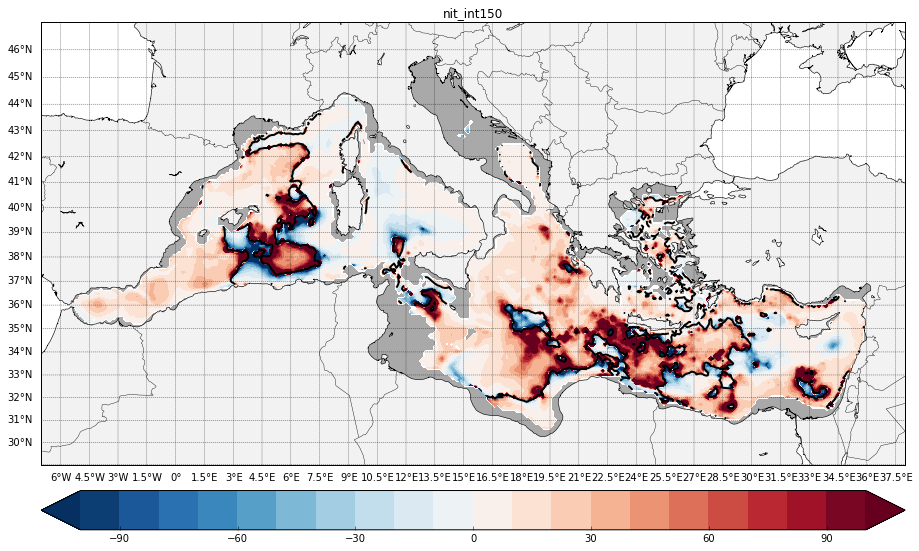

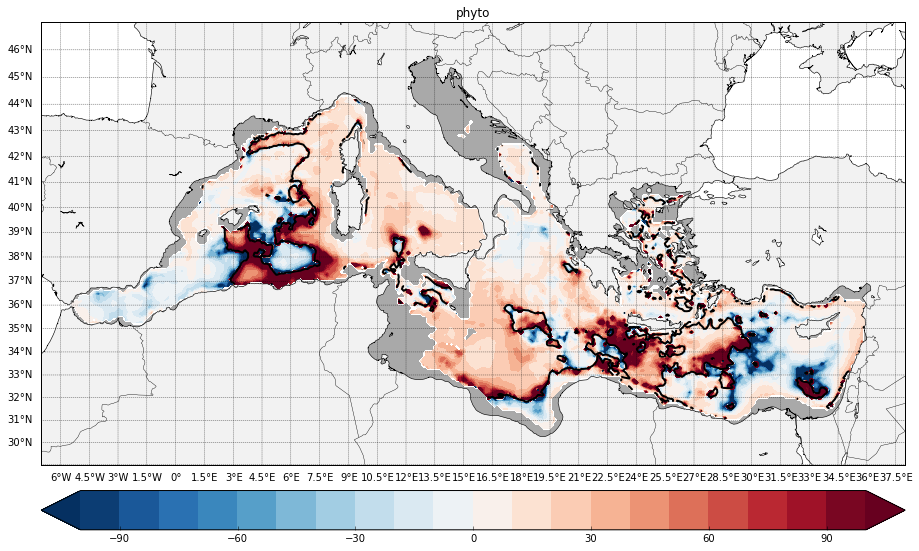

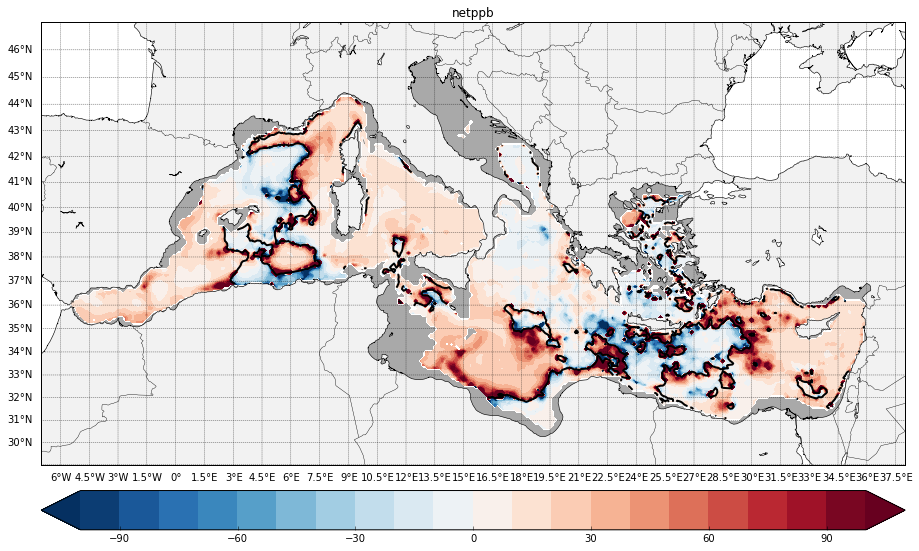

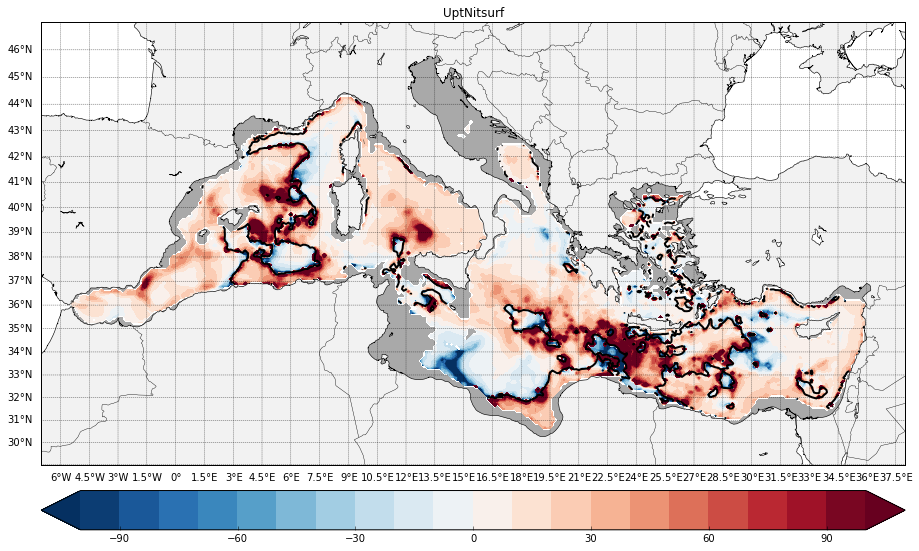

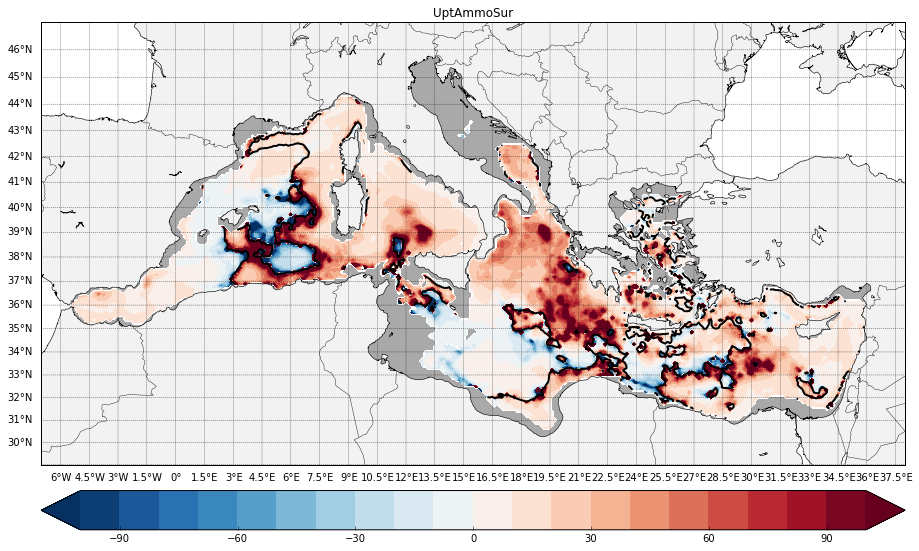

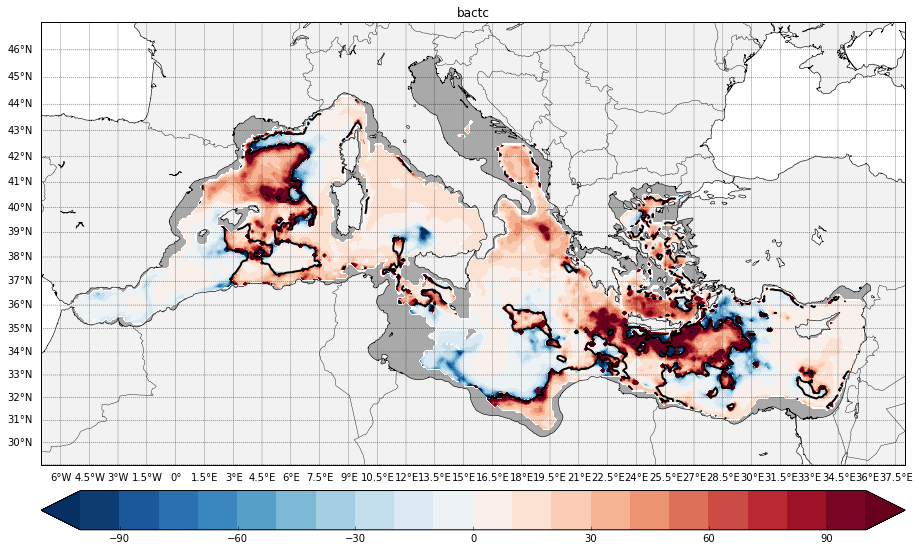

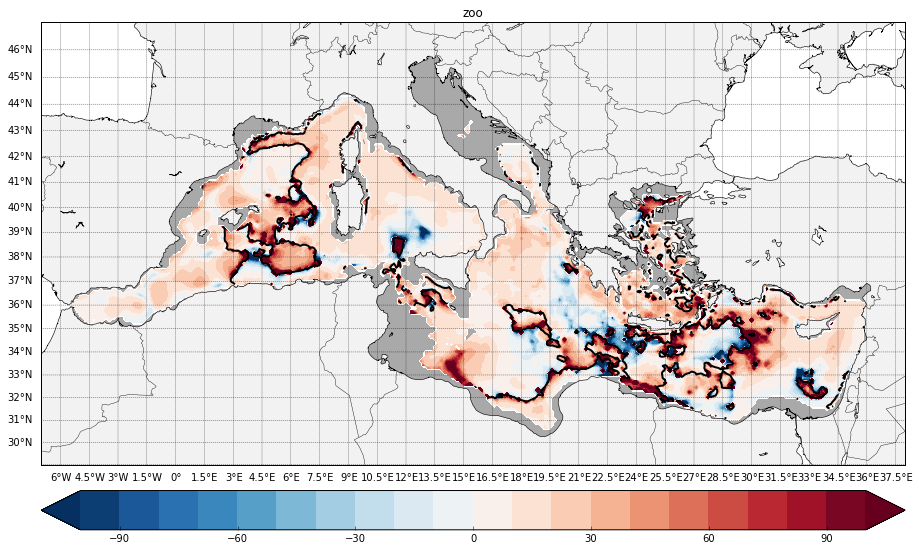

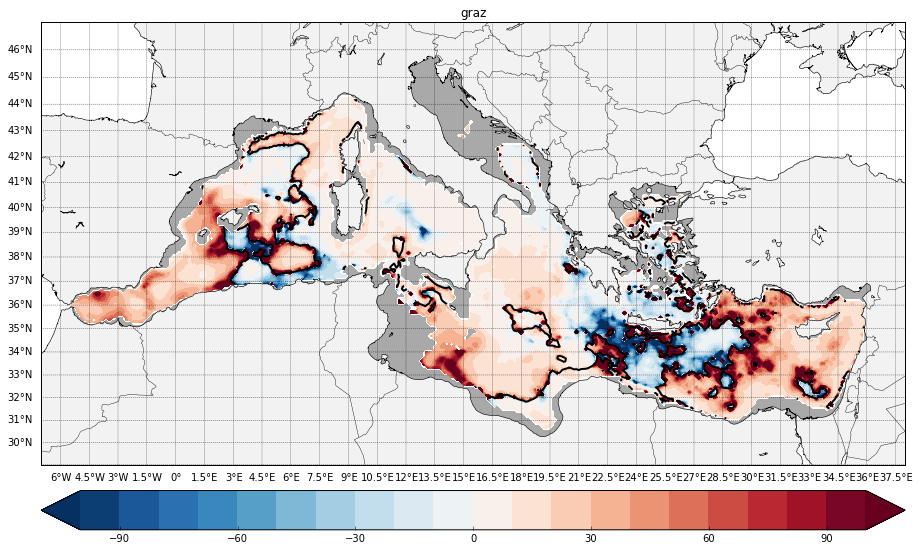

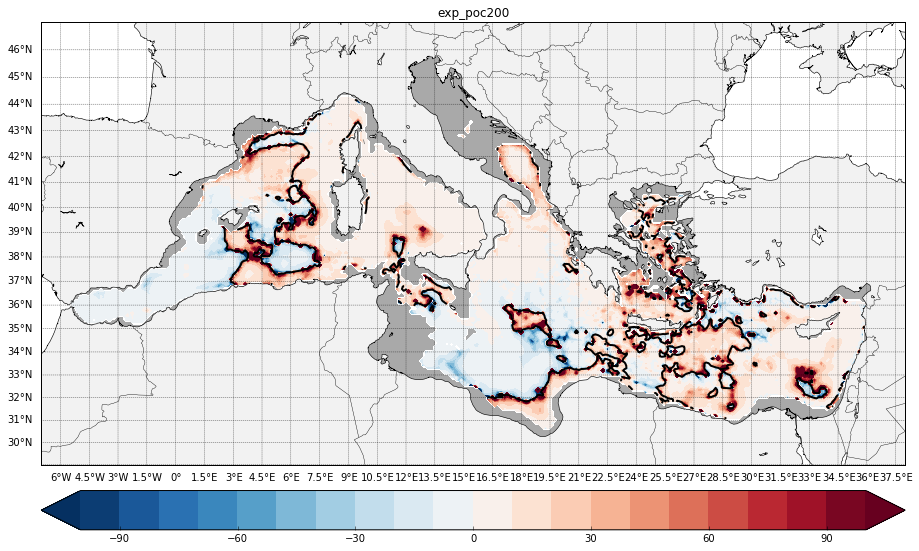

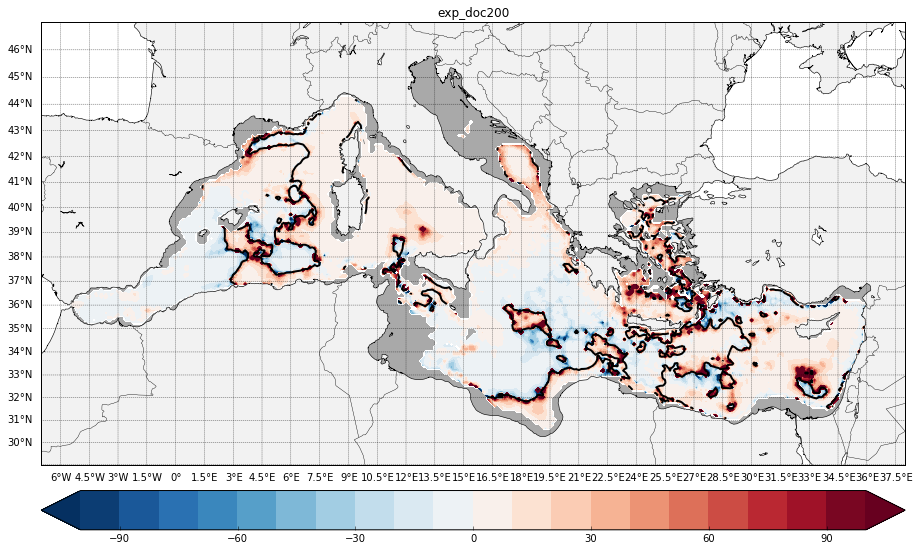

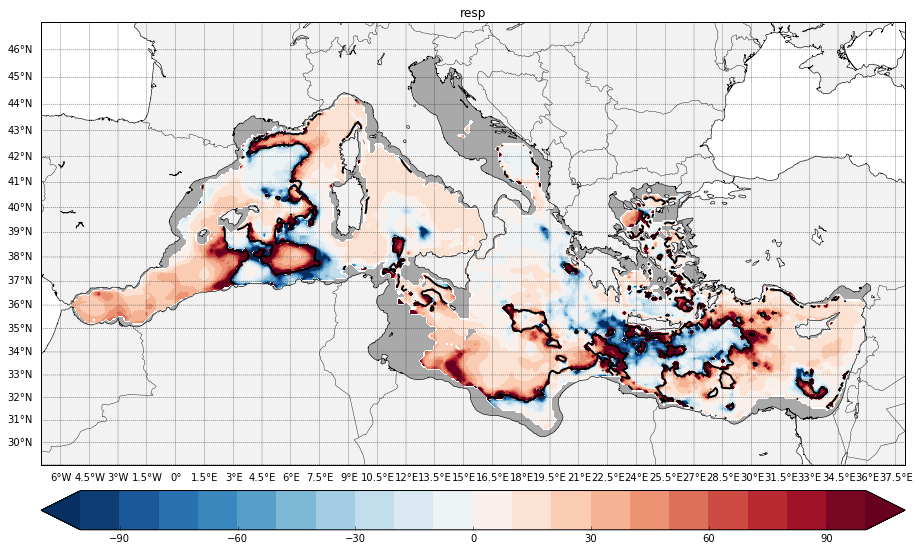

In [90]:
# 20/05
# 15.04 ALL CONTRIBUTIONS
# 14.04 Fait des cartes en point par point % contribution des phyvar

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp'] # 'nit_sw', 

for phyvar in var_phy:
    data2plot = np.zeros([160,394])
    data2plot[:] = np.nan
    
    # Creating corresponding variable names
    temp = vars()['stand_IAV_'+phyvar]
    temp = np.ma.masked_where(bathy<200,temp)
    temp = np.ma.masked_where(lon_t<-5.5,temp)
    #temp = np.ma.masked_where(sum_corr<0,temp)
    
    for i in np.arange(0,160):
        for j in np.arange(0,394):
            data2plot[i,j] = (temp[i,j]/sum_corr[i,j])*100
    
    vars()[phyvar+'_allcontribs'] = data2plot
    
    # Map
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                # figure
    fig = plt.figure(figsize=(15,15));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
    # NEW
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(-100,110,10);
    #levels = np.arange(0,110,10);
    levels2 = [-100]
    levels3 = [100]
    levels_bathy = [200] ;
    m.contourf(xd,yd,test,cmap=plt.cm.Greys);
    CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
    cs = m.contourf(xd,yd,data2plot,cmap=plt.cm.RdBu_r,levels=levels, extend='both');
    #cs = m.contourf(xd,yd,data2plot,cmap=plt.cm.Reds,levels=levels, extend='both');
    #cs_c = m.contour(xd,yd,data2plot,levels=levels2,linewidths=1.5,colors='grey');
    #cs_c2 = m.contour(xd,yd,data2plot,levels=levels3,linewidths=1.5,colors='k')
    #ax.clabel(cs_c, cs_c.levels)
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title(phyvar)
    levels_0 = [0] ;
    cs_zero = m.contour(xd,yd,sum_corr,colors='k',linewidths=2, levels=levels_0); # linestyles='dashdot',
    #plt.savefig('/home/dosa/THESE/CR_reunions/APR2019_FIGS/STD_VAR_STAND_IAV/PHYVARS_CONTRIB_POINT/'+phyvar+'_AllContrib3.png',bbox_inches='tight',format='png')
    plt.savefig('/home/dosa/THESE/CR_reunions/MAY2019_FIGS/PHYVARS_CONTRIB_POINT/'+phyvar+'_AllContrib_nomask_lvl0.png',bbox_inches='tight',format='png')

In [26]:
# doing positive vectors

for phyvar in var_phy:
    vars()['temp_'+phyvar] = vars()['contribs_'+phyvar]

In [27]:
# doing  positive vectors

for phyvar in var_phy:
    temp = vars()['temp_'+phyvar]
    vars()['pos_contribs_'+phyvar] = temp    
    vars()['pos_contribs_'+phyvar][vars()['pos_contribs_'+phyvar]<0] = 0

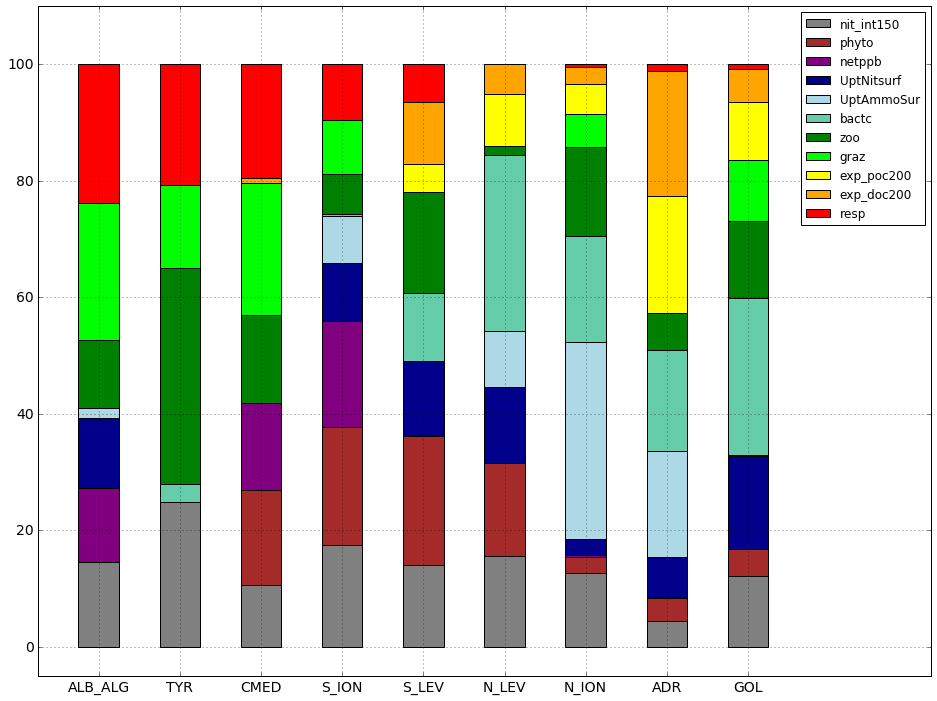

In [29]:
# 14/05 New Test positive contribs
fig, ax = plt.subplots(figsize=(16,12))

N = len(region_list_old_young)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

#p0 = plt.bar(ind,pos_contribs_nit_sw, width,color='k')

#p1 = plt.bar(ind,pos_contribs_nit_int150, width,bottom=pos_contribs_nit_sw,color='grey')
p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')

plt.xticks(ind, region_list_old_young)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-5,110])
plt.xlim([-0.5,10.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
#var_phy3 = ['nit_sw', 'nit_int150', 'phyto', 'netpp']
#plt.legend((p0[0], p1[0], p2[0], p3[0]), var_phy3)

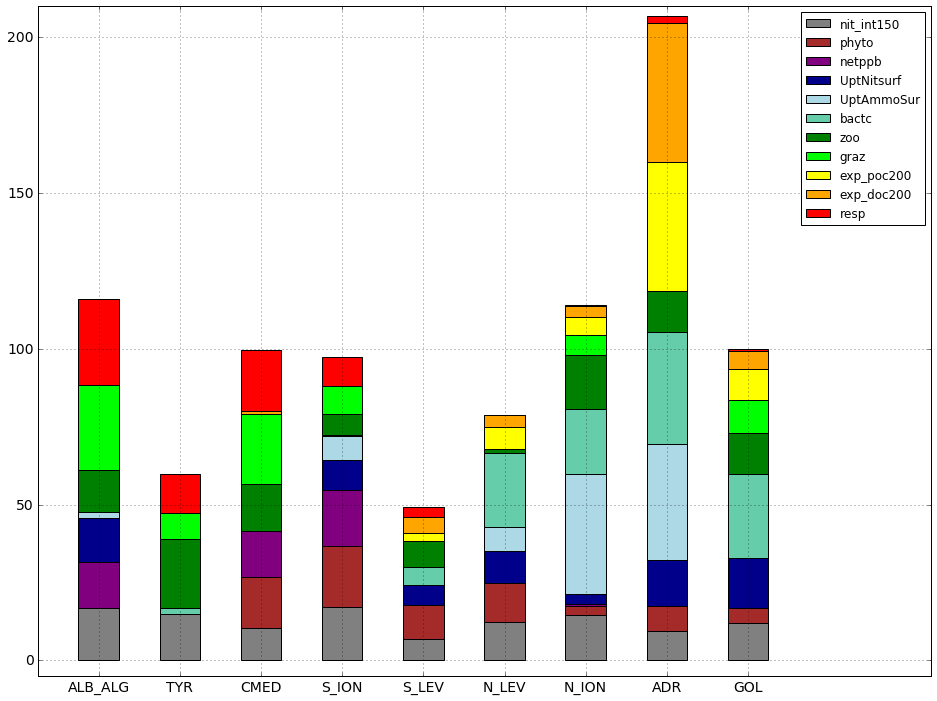

In [113]:
# Test positive contribs
fig, ax = plt.subplots(figsize=(16,12))

N = len(region_list_old_young)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

#p0 = plt.bar(ind,pos_contribs_nit_sw, width,color='k')

#p1 = plt.bar(ind,pos_contribs_nit_int150, width,bottom=pos_contribs_nit_sw,color='grey')
p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')

plt.xticks(ind, region_list_old_young)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-5,210])
plt.xlim([-0.5,10.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
#var_phy3 = ['nit_sw', 'nit_int150', 'phyto', 'netpp']
#plt.legend((p0[0], p1[0], p2[0], p3[0]), var_phy3)

In [30]:
# 14/05 Ici il faut recalculer les contribs avant de faire les calculs négatifs
# 13/05 NEW VERIFS => ici on a contribs negatives et positives (contrairement precedemment)

# 16.04 -nit_sw ; Reorganizing regions
# Pourcentages +/- sur le positif, et figure
# 15.04 ALL CONTRIBUTIONS => REGIONAL MEANS
# Demarche en moy v2 - shorter output

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp']
region_list_old_young = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'S_LEV', 'N_LEV', 'N_ION', 'ADR', 'GOL']

for phyvar in var_phy:
    vars()['contribs_'+phyvar] = np.zeros([len(region_list_old_young)])
i = 0

## 14.04 Regionalisation
for region in region_list_old_young:
    print "Region", region, ":"
    #print ' '
    for phyvar in var_phy:
        # Creating corresponding variable names
        temp = vars()['stand_IAV_'+phyvar]
        temp = np.ma.masked_where(bathy<200,temp)
        temp = np.ma.masked_where(lon_t<-5.5,temp)
    
        # Defining the coordinates
        if region == 'GOL':
            y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                    41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                    39.247095, 46.4938123, 44.4124705]
            x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                    9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                    -1.17747, 5.2446879, 10.1001797]
            curr_col = 'k'
        elif region == 'ALB_ALG':
            y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
            x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9.90934876, 3.994854]
            curr_col = 'k'
        elif region == 'TYR':
            y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                    39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                    41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
            x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                    16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                    9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
            curr_col = 'k'
        elif region == 'CMED':
            y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
            x = [8.92564455, 9.90934876, 10, 15, 15, 13.3111744311976]
        elif region == 'ADR':
            y = [40.138887,39.746050,43,43]
            x = [20.052826,21.936077,21.936077,12]
            curr_col = 'k'
        elif region == 'N_ION':
            y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                    40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
            x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                    16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
            curr_col = 'k'
        elif region == 'S_ION':
            y = [37,29.658354,30.941890,31.924008, #37.503355
                    37.001816]
            x = [21.936077,20.090485,15.297679,15.081913,15.084801]
            curr_col = 'k'
        elif region == 'N_LEV':
            y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 33.8, 33.5, 33.6, 34.5]
            x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 30, 25.5, 22.5, 21.2]
            curr_col = 'k'
        elif region == 'S_LEV':
            y = [34.5,33.6,33.5,33.8,37.180585,30.329515,29.658354]
            x = [21.2,22.5,25.5,30,37.441401,35.238352,20.090485]
        else:
            print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

        # Selecting the data
        vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
        path = Path(vertices, codes=None, closed=True);
        indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                        transform=None, radius=0.0)
        indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone

        # doing a map
        data_to_plot = np.ma.masked_where(bathy<200,temp)
        data_to_plot = np.ma.masked_where(sum_corr<0,data_to_plot)
        data_to_plot = np.ma.masked_array(data_to_plot,indices_re==False)
        vars()[phyvar+'_'+region] = data_to_plot
        
        vars()['tot_'+region] = 0
        
    for phyvar in var_phy:
        if np.nanmean(vars()[phyvar+'_'+region])>0:
            vars()['tot_'+region] = vars()['tot_'+region] + np.nanmean(vars()[phyvar+'_'+region])
    
    for phyvar in var_phy:
        #i = 0
        #vars()['contribs_'+phyvar] = np.zeros([len(var_phy)])
        #if np.nanmean(vars()[phyvar+'_'+region])>0:
            #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_+region'])*100
            #print "contrib", phyvar, "=", vars()['contrib_'+phyvar+'_'+region], "%"
            
        #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/np.nanmean(vars()['correl_'+region]))*100
        vars()['contribs_'+phyvar][i] = np.round((np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_'+region])*100, decimals=2)
        print phyvar, "=", np.round(vars()['contribs_'+phyvar][i],decimals=2), "%"
    i += 1
    
    #print ' '
    #print '---'
    print ' '

Region ALB_ALG :
nit_int150 = 14.56 %
phyto = -8.51 %
netppb = 12.68 %
UptNitsurf = 12.08 %
UptAmmoSur = 1.73 %
bactc = -1.66 %
zoo = 11.65 %
graz = 23.43 %
exp_poc200 = -4.44 %
exp_doc200 = -2.75 %
resp = 23.86 %
 
Region TYR :
nit_int150 = 24.9 %
phyto = -4.84 %
netppb = -0.17 %
UptNitsurf = -0.69 %
UptAmmoSur = -21.87 %
bactc = 3.09 %
zoo = 37.12 %
graz = 14.1 %
exp_poc200 = -0.52 %
exp_doc200 = -2.92 %
resp = 20.8 %
 
Region CMED :
nit_int150 = 10.52 %
phyto = 16.47 %
netppb = 14.86 %
UptNitsurf = -6.5 %
UptAmmoSur = -9.2 %
bactc = -8.83 %
zoo = 15.11 %
graz = 22.63 %
exp_poc200 = -3.87 %
exp_doc200 = 0.99 %
resp = 19.42 %
 
Region S_ION :
nit_int150 = 17.39 %
phyto = 20.3 %
netppb = 18.31 %
UptNitsurf = 9.9 %
UptAmmoSur = 8.02 %
bactc = 0.42 %
zoo = 6.89 %
graz = 9.26 %
exp_poc200 = -3.62 %
exp_doc200 = -3.04 %
resp = 9.51 %
 
Region S_LEV :
nit_int150 = 14.09 %
phyto = 22.02 %
netppb = -8.8 %
UptNitsurf = 12.99 %
UptAmmoSur = -12.59 %
bactc = 11.63 %
zoo = 17.36 %
graz = -16.01 %

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:83: RuntimeWarning: invalid value encountered in less


In [31]:
# 14/05 New try
# doing negative vectors

for phyvar in var_phy:
    vars()['tempneg_'+phyvar] = vars()['contribs_'+phyvar]
    
for phyvar in var_phy:
    temp = vars()['tempneg_'+phyvar]
    vars()['neg_contribs_'+phyvar] = temp
    
    vars()['neg_contribs_'+phyvar][vars()['neg_contribs_'+phyvar]>0] = 0

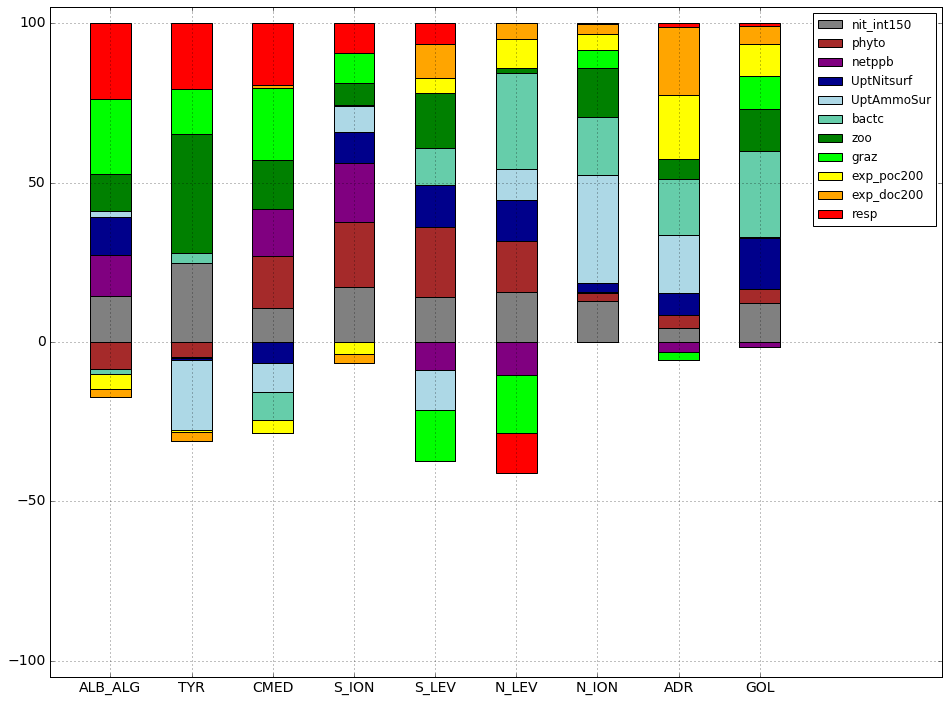

In [33]:
# 14/05 New try positive and negative contribs - nit_sw
# Test positive contribs
fig, ax = plt.subplots(figsize=(16,12))

N = len(region_list_old_young)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')
plt.bar(ind,neg_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')
plt.bar(ind,neg_contribs_phyto, width,bottom=neg_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')
plt.bar(ind,neg_contribs_netppb, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')
plt.bar(ind,neg_contribs_UptNitsurf, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')
plt.bar(ind,neg_contribs_UptAmmoSur, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')
plt.bar(ind,neg_contribs_bactc, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')
plt.bar(ind,neg_contribs_zoo, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')
plt.bar(ind,neg_contribs_graz, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')
plt.bar(ind,neg_contribs_exp_poc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')
plt.bar(ind,neg_contribs_exp_doc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')
plt.bar(ind,neg_contribs_resp, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200+neg_contribs_exp_doc200,color='red')

plt.xticks(ind, region_list_old_young)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-105,105])
plt.xlim([-0.5,10.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)

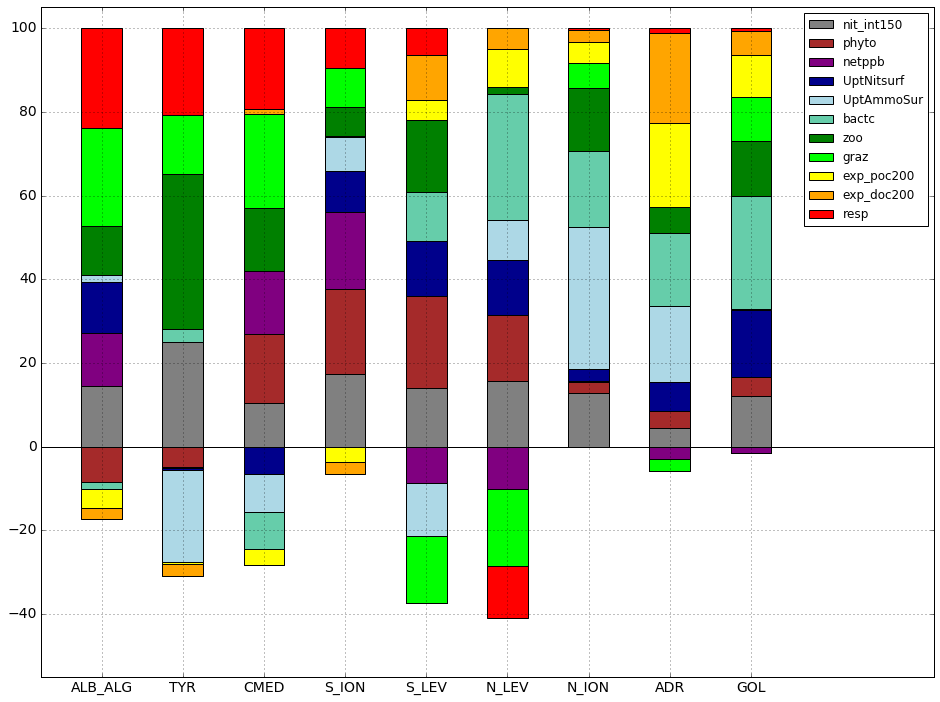

In [47]:
# 15/05 Nice plots
# 14/05 New try positive and negative contribs - nit_sw
# Test positive contribs
fig, ax = plt.subplots(figsize=(16,12))

N = len(region_list_old_young)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')
plt.bar(ind,neg_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')
plt.bar(ind,neg_contribs_phyto, width,bottom=neg_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')
plt.bar(ind,neg_contribs_netppb, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')
plt.bar(ind,neg_contribs_UptNitsurf, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')
plt.bar(ind,neg_contribs_UptAmmoSur, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')
plt.bar(ind,neg_contribs_bactc, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')
plt.bar(ind,neg_contribs_zoo, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')
plt.bar(ind,neg_contribs_graz, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')
plt.bar(ind,neg_contribs_exp_poc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')
plt.bar(ind,neg_contribs_exp_doc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')
plt.bar(ind,neg_contribs_resp, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200+neg_contribs_exp_doc200,color='red')

plt.plot(np.arange(-1,12,1),np.zeros([len(ind)+4]), '-', color='k', linewidth=1)

plt.xticks(ind, region_list_old_young)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-55,105])
plt.xlim([-0.5,10.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)

In [54]:
# 15/05 on teste somme du total stand IAV (pas que positif)
# 14/05 correction erreur tot_+region
# 13/05 NEW VERIFS => ici on a contribs negatives et positives (contrairement precedemment)

# 16.04 -nit_sw ; Reorganizing regions
# Pourcentages +/- sur le positif, et figure
# 15.04 ALL CONTRIBUTIONS => REGIONAL MEANS
# Demarche en moy v2 - shorter output

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp']
region_list_old_young = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'S_LEV', 'N_LEV', 'N_ION', 'ADR', 'GOL']

for phyvar in var_phy:
    vars()['contribs_'+phyvar] = np.zeros([len(region_list_old_young)])
i = 0

## 14.04 Regionalisation
for region in region_list_old_young:
    print "Region", region, ":"
    #print ' '
    for phyvar in var_phy:
        # Creating corresponding variable names
        temp = vars()['stand_IAV_'+phyvar]
        temp = np.ma.masked_where(bathy<200,temp)
        temp = np.ma.masked_where(lon_t<-5.5,temp)
    
        # Defining the coordinates
        if region == 'GOL':
            y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                    41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                    39.247095, 46.4938123, 44.4124705]
            x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                    9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                    -1.17747, 5.2446879, 10.1001797]
            curr_col = 'k'
        elif region == 'ALB_ALG':
            y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
            x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9.90934876, 3.994854]
            curr_col = 'k'
        elif region == 'TYR':
            y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                    39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                    41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
            x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                    16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                    9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
            curr_col = 'k'
        elif region == 'CMED':
            y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
            x = [8.92564455, 9.90934876, 10, 15, 15, 13.3111744311976]
        elif region == 'ADR':
            y = [40.138887,39.746050,43,43]
            x = [20.052826,21.936077,21.936077,12]
            curr_col = 'k'
        elif region == 'N_ION':
            y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                    40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
            x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                    16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
            curr_col = 'k'
        elif region == 'S_ION':
            y = [37,29.658354,30.941890,31.924008, #37.503355
                    37.001816]
            x = [21.936077,20.090485,15.297679,15.081913,15.084801]
            curr_col = 'k'
        elif region == 'N_LEV':
            y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 33.8, 33.5, 33.6, 34.5]
            x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 30, 25.5, 22.5, 21.2]
            curr_col = 'k'
        elif region == 'S_LEV':
            y = [34.5,33.6,33.5,33.8,37.180585,30.329515,29.658354]
            x = [21.2,22.5,25.5,30,37.441401,35.238352,20.090485]
        else:
            print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

        # Selecting the data
        vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
        path = Path(vertices, codes=None, closed=True);
        indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                        transform=None, radius=0.0)
        indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone

        # doing a map
        data_to_plot = np.ma.masked_where(bathy<200,temp)
        data_to_plot = np.ma.masked_where(sum_corr<0,data_to_plot)
        data_to_plot = np.ma.masked_array(data_to_plot,indices_re==False)
        vars()[phyvar+'_'+region] = data_to_plot
        
        vars()['tot_'+region] = 0
        
    for phyvar in var_phy:
        # 15/05 
        #if np.nanmean(vars()[phyvar+'_'+region])>0:
        #    vars()['tot_'+region] = vars()['tot_'+region] + np.nanmean(vars()[phyvar+'_'+region])
        vars()['tot_'+region] = vars()['tot_'+region] + np.nanmean(vars()[phyvar+'_'+region])
    
    for phyvar in var_phy:
        #i = 0
        #vars()['contribs_'+phyvar] = np.zeros([len(var_phy)])
        #if np.nanmean(vars()[phyvar+'_'+region])>0:
            #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_+region'])*100
            #print "contrib", phyvar, "=", vars()['contrib_'+phyvar+'_'+region], "%"
            
        #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/np.nanmean(vars()['correl_'+region]))*100
        vars()['contribs_'+phyvar][i] = np.round((np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_'+region])*100, decimals=2)
        print phyvar, "=", np.round(vars()['contribs_'+phyvar][i],decimals=2), "%"
    i += 1
    
    #print ' '
    #print '---'
    print ' '

Region ALB_ALG :
nit_int150 = 17.62 %
phyto = -10.3 %
netppb = 15.35 %
UptNitsurf = 14.62 %
UptAmmoSur = 2.09 %
bactc = -2.01 %
zoo = 14.09 %
graz = 28.35 %
exp_poc200 = -5.37 %
exp_doc200 = -3.33 %
resp = 28.88 %
 
Region TYR :
nit_int150 = 36.09 %
phyto = -7.01 %
netppb = -0.25 %
UptNitsurf = -1.0 %
UptAmmoSur = -31.71 %
bactc = 4.47 %
zoo = 53.81 %
graz = 20.44 %
exp_poc200 = -0.75 %
exp_doc200 = -4.24 %
resp = 30.15 %
 
Region CMED :
nit_int150 = 14.69 %
phyto = 23.0 %
netppb = 20.76 %
UptNitsurf = -9.08 %
UptAmmoSur = -12.85 %
bactc = -12.34 %
zoo = 21.1 %
graz = 31.62 %
exp_poc200 = -5.41 %
exp_doc200 = 1.39 %
resp = 27.13 %
 
Region S_ION :
nit_int150 = 18.63 %
phyto = 21.75 %
netppb = 19.61 %
UptNitsurf = 10.61 %
UptAmmoSur = 8.59 %
bactc = 0.45 %
zoo = 7.38 %
graz = 9.92 %
exp_poc200 = -3.88 %
exp_doc200 = -3.26 %
resp = 10.19 %
 
Region S_LEV :
nit_int150 = 22.51 %
phyto = 35.18 %
netppb = -14.05 %
UptNitsurf = 20.75 %
UptAmmoSur = -20.12 %
bactc = 18.58 %
zoo = 27.74 %
graz 

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:84: RuntimeWarning: invalid value encountered in less


In [49]:
# 14/05 Pour vérif les sommes il faut sommer les colonnes 

# regions indexees => 0 à 8 ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'S_LEV', 'N_LEV', 'N_ION', 'ADR', 'GOL']
tot = 0

for phyvar in var_phy:
    print phyvar, 'nanmean:', np.nanmean(vars()[phyvar+'_TYR'])
    if np.nanmean(vars()[phyvar+'_TYR'])>0:
        tot = tot + vars()['contribs_'+phyvar][1]
        print 'contrib', vars()['contribs_'+phyvar][1]
        print "Total =", tot, "% TYR"
    print ' '
print "Total =", tot, "%"

nit_int150 nanmean: 0.795286
contrib 36.09
Total = 36.09 % TYR
 
phyto nanmean: -0.154536
 
netppb nanmean: -0.00554514
 
UptNitsurf nanmean: -0.0219739
 
UptAmmoSur nanmean: -0.69871
 
bactc nanmean: 0.0986099
contrib 4.47
Total = 40.56 % TYR
 
zoo nanmean: 1.18575
contrib 53.81
Total = 94.37 % TYR
 
graz nanmean: 0.450367
contrib 20.44
Total = 114.81 % TYR
 
exp_poc200 nanmean: -0.0166086
 
exp_doc200 nanmean: -0.0933422
 
resp nanmean: 0.664334
contrib 30.15
Total = 144.96 % TYR
 
Total = 144.96 %


In [50]:
# ok ça fait pas 100% comme prévu

In [55]:
# 15/05 

# doing positive vectors
for phyvar in var_phy:
    vars()['temp_'+phyvar] = vars()['contribs_'+phyvar]
    
# doing  positive vectors

for phyvar in var_phy:
    temp = vars()['temp_'+phyvar]
    vars()['pos_contribs_'+phyvar] = temp    
    vars()['pos_contribs_'+phyvar][vars()['pos_contribs_'+phyvar]<0] = 0



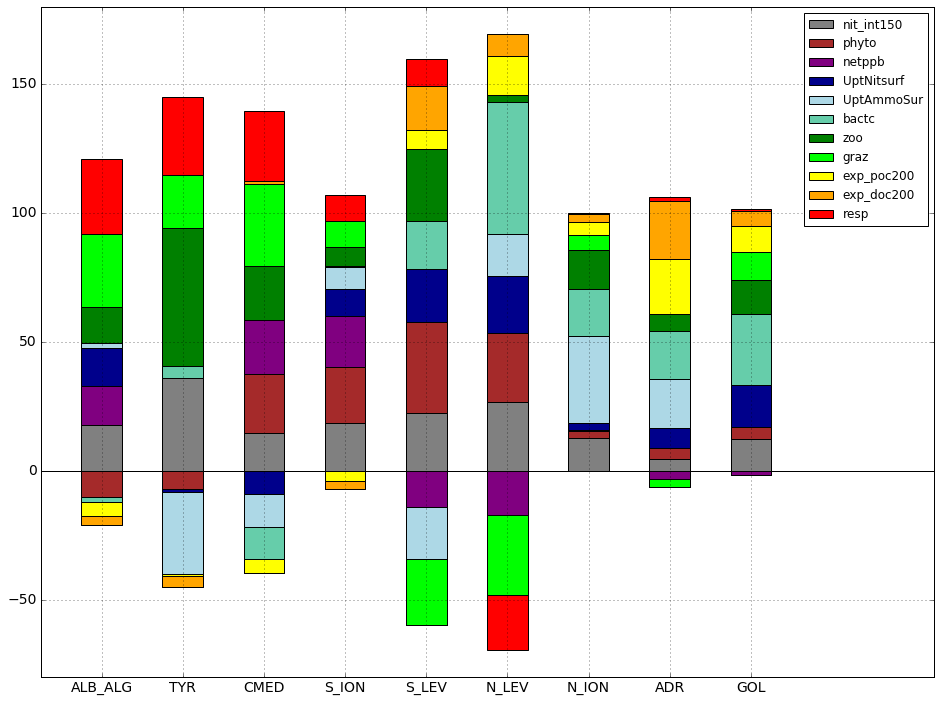

In [60]:
# 15/05
# 14/05 New try positive and negative contribs - nit_sw
# Test positive contribs
fig, ax = plt.subplots(figsize=(16,12))

N = len(region_list_old_young)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')
plt.bar(ind,neg_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')
plt.bar(ind,neg_contribs_phyto, width,bottom=neg_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')
plt.bar(ind,neg_contribs_netppb, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')
plt.bar(ind,neg_contribs_UptNitsurf, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')
plt.bar(ind,neg_contribs_UptAmmoSur, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')
plt.bar(ind,neg_contribs_bactc, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')
plt.bar(ind,neg_contribs_zoo, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')
plt.bar(ind,neg_contribs_graz, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')
plt.bar(ind,neg_contribs_exp_poc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')
plt.bar(ind,neg_contribs_exp_doc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')
plt.bar(ind,neg_contribs_resp, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200+neg_contribs_exp_doc200,color='red')

plt.plot(np.arange(-1,12,1),np.zeros([len(ind)+4]), '-', color='k', linewidth=1)

plt.xticks(ind, region_list_old_young)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-80,180])
plt.xlim([-0.5,10.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
plt.savefig('/home/dosa/THESE/CR_reunions/MAY2019_FIGS/AllContribs_SumAll.png',bbox_inches='tight',format='png')

In [12]:
# 19/05 I DO POSITIVE CONTRIBUTIONS, on NEW regions

In [76]:
# 19/05 POSITIVE CONTRIBUTIONS, new regions
# 14/05 correction erreur tot_+region
# 13/05 NEW VERIFS => ici on a contribs negatives et positives (contrairement precedemment)

# 16.04 -nit_sw ; Reorganizing regions
# Pourcentages +/- sur le positif, et figure
# 15.04 ALL CONTRIBUTIONS => REGIONAL MEANS
# Demarche en moy v2 - shorter output

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp']
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']
#region_list_new_reorg = ['ALB_ALG', 'NWMED', 'GOL', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR']

for phyvar in var_phy:
    vars()['contribs_'+phyvar] = np.zeros([len(region_list_new_reorg)])
i = 0

## 14.04 Regionalisation
for region in region_list_new_reorg:
    print "Region", region, ":"
    #print ' '
    for phyvar in var_phy:
        # Creating corresponding variable names
        temp = vars()['stand_IAV_'+phyvar]
        temp = np.ma.masked_where(bathy<200,temp)
        temp = np.ma.masked_where(lon_t<-5.5,temp)
    
        # Defining the coordinates
        if region == 'NWMED':
            y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                    41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                    39.247095, 46.4938123, 44.4124705]
            x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                    9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                    -1.17747, 5.2446879, 10.1001797]
        elif region == 'ALB_ALG':
            y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
            x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9, 3.994854] # 9.90934876
        elif region == 'TYR':
            y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                    39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                    41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
            x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                    16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                    9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
        elif region == 'CMED':
            y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
            x = [8.92564455, 9, 10, 15, 15, 13.3111744311976] # 9.90934876
        elif region == 'ADR':
            y = [40.138887,39.746050,43,43]
            x = [18.343058,20.052826,20.052826,13]
        elif region == 'N_ION':
            y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                    40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
            x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                    16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
        elif region == 'S_ION':
            y = [37,29.658354,30.941890,31.924008, #37.503355
                    37.001816]
            x = [21.936077,20.090485,15.297679,15.081913,15.084801]
        elif region == 'EMED':
            y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 37.180585,30.329515,29.658354]
            x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 37.441401,35.238352,20.090485]
        elif region == 'AEG':
            y = [43,39.746050,37.503355,37,35.335479,35.045582,35.478996,36.113327,40.879240]
            x = [20.052826,20.052826,21.936077,21.936077,23.620988,26.217209,27.159167,28.006273,30.504893]
        elif region == 'GOL':
            y = [43.5,43.5,41,41]
            x = [3,6.5,6.5,3]
        else:
            print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

        # Selecting the data
        vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
        path = Path(vertices, codes=None, closed=True);
        indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                        transform=None, radius=0.0)
        indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone

        # doing a map
        data_to_plot = np.ma.masked_where(bathy<200,temp)
        data_to_plot = np.ma.masked_where(sum_corr<0,data_to_plot)
        data_to_plot = np.ma.masked_array(data_to_plot,indices_re==False)
        vars()[phyvar+'_'+region] = data_to_plot
        
        vars()['tot_'+region] = 0
        
    for phyvar in var_phy:
        if np.nanmean(vars()[phyvar+'_'+region])>0:
            vars()['tot_'+region] = vars()['tot_'+region] + np.nanmean(vars()[phyvar+'_'+region])
    
    for phyvar in var_phy:
        #i = 0
        #vars()['contribs_'+phyvar] = np.zeros([len(var_phy)])
        #if np.nanmean(vars()[phyvar+'_'+region])>0:
            #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_+region'])*100
            #print "contrib", phyvar, "=", vars()['contrib_'+phyvar+'_'+region], "%"
            
        #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/np.nanmean(vars()['correl_'+region]))*100
        vars()['contribs_'+phyvar][i] = np.round((np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_'+region])*100, decimals=2)
        print phyvar, "=", np.round(vars()['contribs_'+phyvar][i],decimals=2), "%"
    i += 1
    
    #print ' '
    #print '---'
    print ' '

Region ALB_ALG :
nit_int150 = 14.56 %
phyto = -8.51 %
netppb = 12.68 %
UptNitsurf = 12.08 %
UptAmmoSur = 1.73 %
bactc = -1.66 %
zoo = 11.65 %
graz = 23.43 %
exp_poc200 = -4.44 %
exp_doc200 = -2.75 %
resp = 23.86 %
 
Region TYR :
nit_int150 = 24.9 %
phyto = -4.84 %
netppb = -0.17 %
UptNitsurf = -0.69 %
UptAmmoSur = -21.87 %
bactc = 3.09 %
zoo = 37.12 %
graz = 14.1 %
exp_poc200 = -0.52 %
exp_doc200 = -2.92 %
resp = 20.8 %
 
Region CMED :
nit_int150 = 10.52 %
phyto = 16.47 %
netppb = 14.86 %
UptNitsurf = -6.5 %
UptAmmoSur = -9.2 %
bactc = -8.83 %
zoo = 15.11 %
graz = 22.63 %
exp_poc200 = -3.87 %
exp_doc200 = 0.99 %
resp = 19.42 %
 
Region S_ION :
nit_int150 = 17.39 %
phyto = 20.3 %
netppb = 18.31 %
UptNitsurf = 9.9 %
UptAmmoSur = 8.02 %
bactc = 0.42 %
zoo = 6.89 %
graz = 9.26 %
exp_poc200 = -3.62 %
exp_doc200 = -3.04 %
resp = 9.51 %
 
Region EMED :
nit_int150 = 15.92 %
phyto = 18.37 %
netppb = -10.38 %
UptNitsurf = 13.55 %
UptAmmoSur = 4.21 %
bactc = 26.92 %
zoo = 5.71 %
graz = -18.64 %
e

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:81: RuntimeWarning: invalid value encountered in less


In [77]:
# doing positive vectors

for phyvar in var_phy:
    vars()['temp_'+phyvar] = vars()['contribs_'+phyvar]

In [78]:
# doing  positive vectors

for phyvar in var_phy:
    temp = vars()['temp_'+phyvar]
    vars()['pos_contribs_'+phyvar] = temp    
    vars()['pos_contribs_'+phyvar][vars()['pos_contribs_'+phyvar]<0] = 0

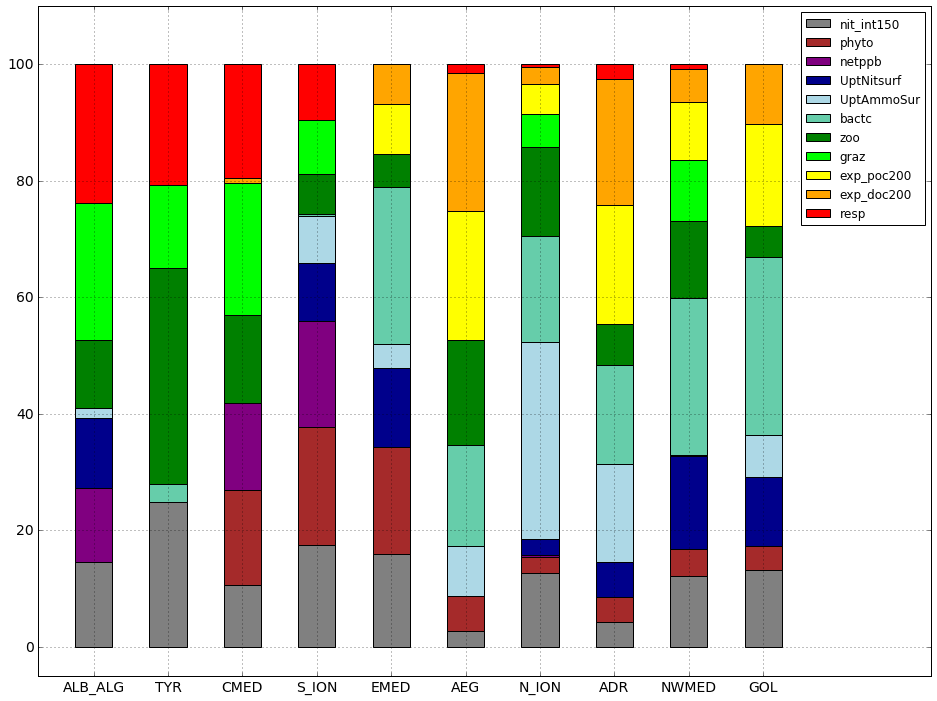

In [79]:
# 19/05 Only positive contribs on positive sum corr
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']
#region_list_new_reorg = ['ALB_ALG', 'NWMED', 'GOL', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR']

fig, ax = plt.subplots(figsize=(16,12))
N = len(region_list_new_reorg)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

#p0 = plt.bar(ind,pos_contribs_nit_sw, width,color='k')

#p1 = plt.bar(ind,pos_contribs_nit_int150, width,bottom=pos_contribs_nit_sw,color='grey')
p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')

plt.xticks(ind, region_list_new_reorg)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-5,110])
plt.xlim([-0.5,11.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
#var_phy3 = ['nit_sw', 'nit_int150', 'phyto', 'netpp']
#plt.legend((p0[0], p1[0], p2[0], p3[0]), var_phy3)

In [80]:
# 19/05 Now doing negative vectors: COMPUTING CONTRIBUTIONS (once again)
# 14/05 correction erreur tot_+region
# 13/05 NEW VERIFS => ici on a contribs negatives et positives (contrairement precedemment)

# 16.04 -nit_sw ; Reorganizing regions
# Pourcentages +/- sur le positif, et figure
# 15.04 ALL CONTRIBUTIONS => REGIONAL MEANS
# Demarche en moy v2 - shorter output

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp']
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']

for phyvar in var_phy:
    vars()['contribs_'+phyvar] = np.zeros([len(region_list_new_reorg)])
i = 0

## 14.04 Regionalisation
for region in region_list_new_reorg:
    print "Region", region, ":"
    #print ' '
    for phyvar in var_phy:
        # Creating corresponding variable names
        temp = vars()['stand_IAV_'+phyvar]
        temp = np.ma.masked_where(bathy<200,temp)
        temp = np.ma.masked_where(lon_t<-5.5,temp)
    
        # Defining the coordinates
        if region == 'NWMED':
            y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                    41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                    39.247095, 46.4938123, 44.4124705]
            x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                    9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                    -1.17747, 5.2446879, 10.1001797]
        elif region == 'ALB_ALG':
            y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
            x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9, 3.994854] # 9.90934876
        elif region == 'TYR':
            y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                    39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                    41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
            x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                    16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                    9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
        elif region == 'CMED':
            y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
            x = [8.92564455, 9, 10, 15, 15, 13.3111744311976] # 9.90934876
        elif region == 'ADR':
            y = [40.138887,39.746050,43,43]
            x = [18.343058,20.052826,20.052826,13]
        elif region == 'N_ION':
            y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                    40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
            x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                    16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
        elif region == 'S_ION':
            y = [37,29.658354,30.941890,31.924008, #37.503355
                    37.001816]
            x = [21.936077,20.090485,15.297679,15.081913,15.084801]
        elif region == 'EMED':
            y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 37.180585,30.329515,29.658354]
            x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 37.441401,35.238352,20.090485]
        elif region == 'AEG':
            y = [43,39.746050,37.503355,37,35.335479,35.045582,35.478996,36.113327,40.879240]
            x = [20.052826,20.052826,21.936077,21.936077,23.620988,26.217209,27.159167,28.006273,30.504893]
        elif region == 'GOL':
            y = [43.5,43.5,41,41]
            x = [3,6.5,6.5,3]
        else:
            print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

        # Selecting the data
        vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
        path = Path(vertices, codes=None, closed=True);
        indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                        transform=None, radius=0.0)
        indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone

        # doing a map
        data_to_plot = np.ma.masked_where(bathy<200,temp)
        data_to_plot = np.ma.masked_where(sum_corr<0,data_to_plot)
        data_to_plot = np.ma.masked_array(data_to_plot,indices_re==False)
        vars()[phyvar+'_'+region] = data_to_plot
        
        vars()['tot_'+region] = 0
        
    for phyvar in var_phy:
        if np.nanmean(vars()[phyvar+'_'+region])>0:
            vars()['tot_'+region] = vars()['tot_'+region] + np.nanmean(vars()[phyvar+'_'+region])
    
    for phyvar in var_phy:
        #i = 0
        #vars()['contribs_'+phyvar] = np.zeros([len(var_phy)])
        #if np.nanmean(vars()[phyvar+'_'+region])>0:
            #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_+region'])*100
            #print "contrib", phyvar, "=", vars()['contrib_'+phyvar+'_'+region], "%"
            
        #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/np.nanmean(vars()['correl_'+region]))*100
        vars()['contribs_'+phyvar][i] = np.round((np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_'+region])*100, decimals=2)
        print phyvar, "=", np.round(vars()['contribs_'+phyvar][i],decimals=2), "%"
    i += 1
    
    #print ' '
    #print '---'
    print ' '

Region ALB_ALG :
nit_int150 = 14.56 %
phyto = -8.51 %
netppb = 12.68 %
UptNitsurf = 12.08 %
UptAmmoSur = 1.73 %
bactc = -1.66 %
zoo = 11.65 %
graz = 23.43 %
exp_poc200 = -4.44 %
exp_doc200 = -2.75 %
resp = 23.86 %
 
Region TYR :
nit_int150 = 24.9 %
phyto = -4.84 %
netppb = -0.17 %
UptNitsurf = -0.69 %
UptAmmoSur = -21.87 %
bactc = 3.09 %
zoo = 37.12 %
graz = 14.1 %
exp_poc200 = -0.52 %
exp_doc200 = -2.92 %
resp = 20.8 %
 
Region CMED :
nit_int150 = 10.52 %
phyto = 16.47 %
netppb = 14.86 %
UptNitsurf = -6.5 %
UptAmmoSur = -9.2 %
bactc = -8.83 %
zoo = 15.11 %
graz = 22.63 %
exp_poc200 = -3.87 %
exp_doc200 = 0.99 %
resp = 19.42 %
 
Region S_ION :
nit_int150 = 17.39 %
phyto = 20.3 %
netppb = 18.31 %
UptNitsurf = 9.9 %
UptAmmoSur = 8.02 %
bactc = 0.42 %
zoo = 6.89 %
graz = 9.26 %
exp_poc200 = -3.62 %
exp_doc200 = -3.04 %
resp = 9.51 %
 
Region EMED :
nit_int150 = 15.92 %
phyto = 18.37 %
netppb = -10.38 %
UptNitsurf = 13.55 %
UptAmmoSur = 4.21 %
bactc = 26.92 %
zoo = 5.71 %
graz = -18.64 %
e

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in less


In [81]:
# 19/05 Doing negative vectors

for phyvar in var_phy:
    vars()['tempneg_'+phyvar] = vars()['contribs_'+phyvar]

In [82]:
for phyvar in var_phy:
    temp = vars()['tempneg_'+phyvar]
    vars()['neg_contribs_'+phyvar] = temp
    
    vars()['neg_contribs_'+phyvar][vars()['neg_contribs_'+phyvar]>=0] = 0

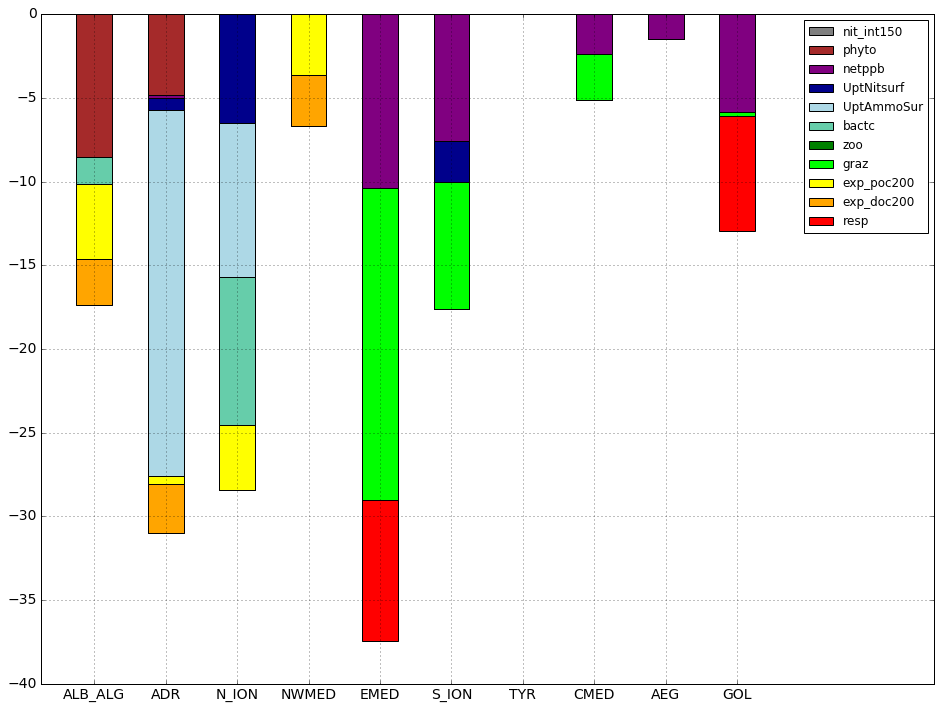

In [88]:
# 20/05 Figure negative only

# Test positive contribs
fig, ax = plt.subplots(figsize=(16,12))

N = len(region_list_old_young)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

#p0 = plt.bar(ind,neg_contribs_nit_sw, width,color='k')

#p1 = plt.bar(ind,neg_contribs_nit_int150, width,bottom=neg_contribs_nit_sw,color='grey')
p1 = plt.bar(ind,neg_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,neg_contribs_phyto, width,bottom=neg_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,neg_contribs_netppb, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,neg_contribs_UptNitsurf, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,neg_contribs_UptAmmoSur, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,neg_contribs_bactc, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,neg_contribs_zoo, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc,color='green')

p8 = plt.bar(ind,neg_contribs_graz, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo,color='lime')

p9 = plt.bar(ind,neg_contribs_exp_poc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz,color='yellow')

p10 = plt.bar(ind,neg_contribs_exp_doc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,neg_contribs_resp, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200+neg_contribs_exp_doc200,color='red')

plt.xticks(ind, region_list_old_young)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-40,0])
plt.xlim([-0.5,12])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
#var_phy3 = ['nit_sw', 'nit_int150', 'phyto', 'netpp']
#plt.legend((p0[0], p1[0], p2[0], p3[0]), var_phy3)

In [87]:
# Everything seems ok!!!

# Now both positive and negative contributions on the same plot

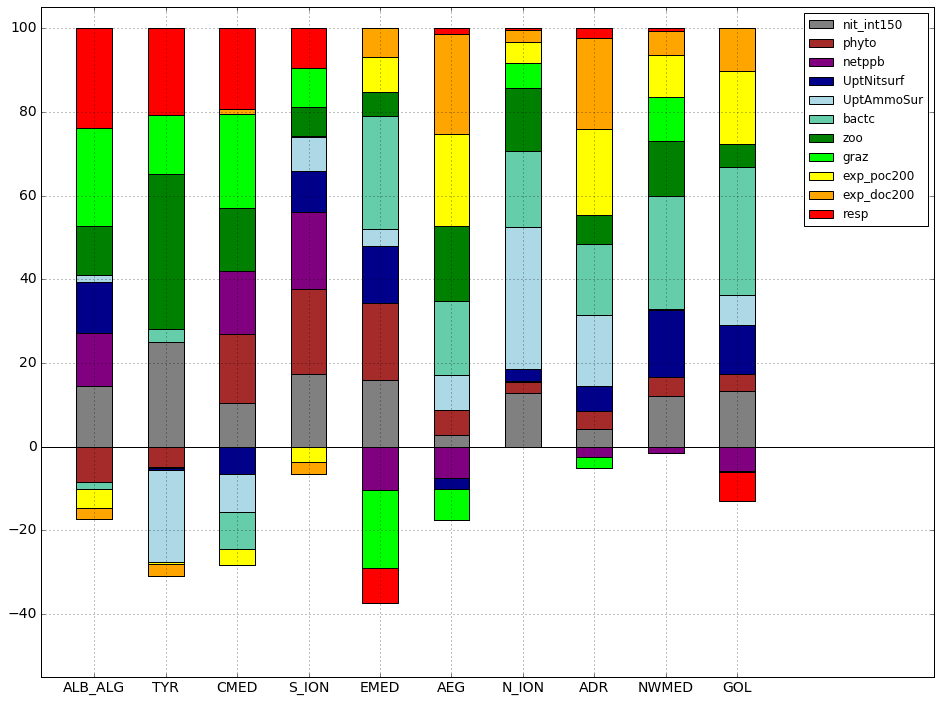

In [83]:
# 19/05 Positive and negative contributions in POSITIVE SUM CORR regions
# 14/05 New try positive and negative contribs - nit_sw
# Test positive contribs
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']

fig, ax = plt.subplots(figsize=(16,12))
N = len(region_list_new_reorg)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')
plt.bar(ind,neg_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')
plt.bar(ind,neg_contribs_phyto, width,bottom=neg_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')
plt.bar(ind,neg_contribs_netppb, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')
plt.bar(ind,neg_contribs_UptNitsurf, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')
plt.bar(ind,neg_contribs_UptAmmoSur, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')
plt.bar(ind,neg_contribs_bactc, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')
plt.bar(ind,neg_contribs_zoo, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')
plt.bar(ind,neg_contribs_graz, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')
plt.bar(ind,neg_contribs_exp_poc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')
plt.bar(ind,neg_contribs_exp_doc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')
plt.bar(ind,neg_contribs_resp, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200+neg_contribs_exp_doc200,color='red')

plt.plot(np.arange(-1,13,1),np.zeros([len(ind)+4]), '-', color='k', linewidth=1)

plt.xticks(ind, region_list_new_reorg)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-55,105])
plt.xlim([-0.5,12])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)

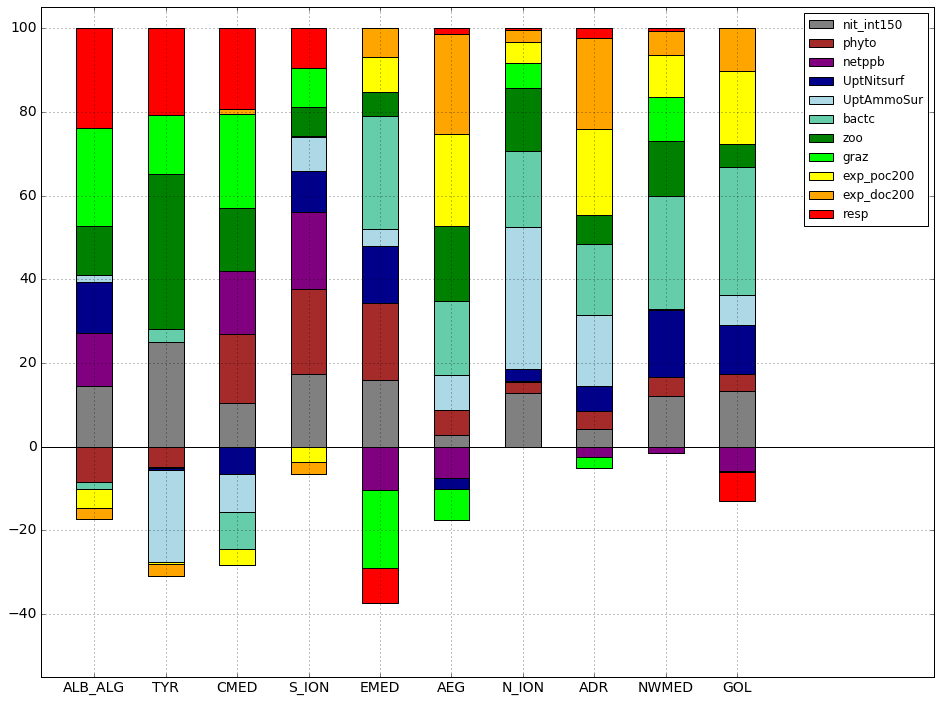

In [65]:
# 19/05 Positive and negative contributions in POSITIVE SUM CORR regions
# 14/05 New try positive and negative contribs - nit_sw
# Test positive contribs
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']

fig, ax = plt.subplots(figsize=(16,12))
N = len(region_list_new_reorg)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')
plt.bar(ind,neg_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')
plt.bar(ind,neg_contribs_phyto, width,bottom=neg_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')
plt.bar(ind,neg_contribs_netppb, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')
plt.bar(ind,neg_contribs_UptNitsurf, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')
plt.bar(ind,neg_contribs_UptAmmoSur, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')
plt.bar(ind,neg_contribs_bactc, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')
plt.bar(ind,neg_contribs_zoo, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')
plt.bar(ind,neg_contribs_graz, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')
plt.bar(ind,neg_contribs_exp_poc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')
plt.bar(ind,neg_contribs_exp_doc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')
plt.bar(ind,neg_contribs_resp, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200+neg_contribs_exp_doc200,color='red')

plt.plot(np.arange(-1,13,1),np.zeros([len(ind)+4]), '-', color='k', linewidth=1)

plt.xticks(ind, region_list_new_reorg)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-55,105])
plt.xlim([-0.5,12])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)

In [ ]:
###################### NEGATIVE ######################

In [ ]:
# 20/05 Tests

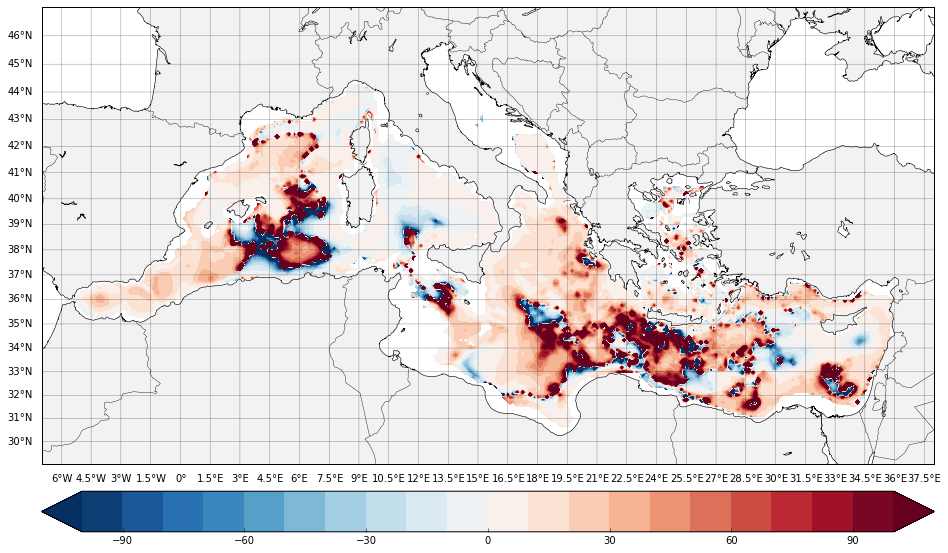

In [96]:
# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-100,110,10)
cs = m.contourf(xd,yd,nit_int150_allcontribs,cmap=plt.cm.RdBu_r, levels=levels, extend='both');
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

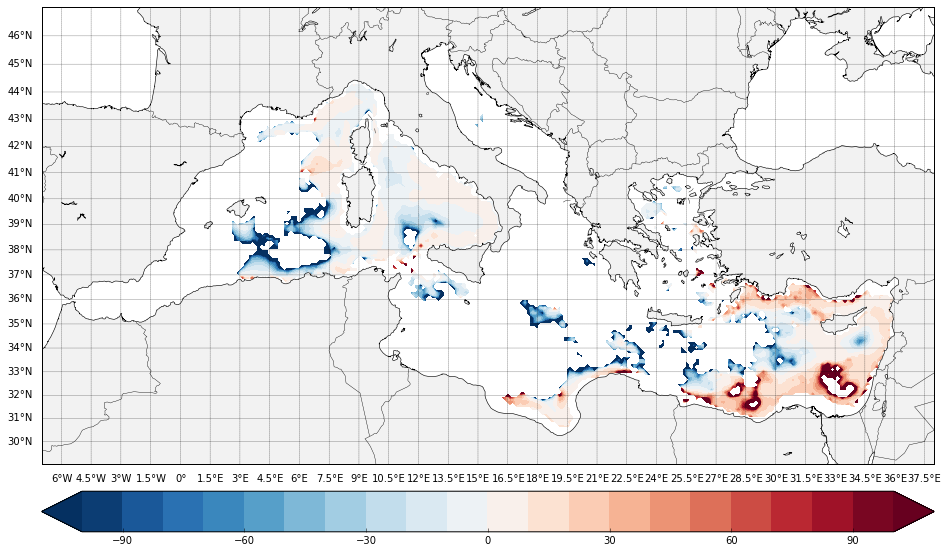

In [100]:
nit_int150_negmask = np.ma.masked_where(sum_corr>=0, nit_int150_allcontribs)

# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-100,110,10)
cs = m.contourf(xd,yd,nit_int150_negmask,cmap=plt.cm.RdBu_r, levels=levels, extend='both');
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

In [99]:
# 20/05

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp']
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']

for phyvar in var_phy:
    vars()[phyvar+'_negmask'] = np.zeros([160,394])

## 14.04 Regionalisation
for region in region_list_new_reorg:
    print "Region", region, ":"
    #print ' '
    for phyvar in var_phy:
        # Creating corresponding variable names
        temp = vars()['stand_IAV_'+phyvar]
        temp = np.ma.masked_where(bathy<200,temp)
        temp = np.ma.masked_where(lon_t<-5.5,temp)
    
        # Defining the coordinates
        if region == 'NWMED':
            y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                    41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                    39.247095, 46.4938123, 44.4124705]
            x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                    9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                    -1.17747, 5.2446879, 10.1001797]
        elif region == 'ALB_ALG':
            y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
            x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9, 3.994854] # 9.90934876
        elif region == 'TYR':
            y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                    39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                    41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
            x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                    16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                    9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
        elif region == 'CMED':
            y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
            x = [8.92564455, 9, 10, 15, 15, 13.3111744311976] # 9.90934876
        elif region == 'ADR':
            y = [40.138887,39.746050,43,43]
            x = [18.343058,20.052826,20.052826,13]
        elif region == 'N_ION':
            y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                    40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
            x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                    16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
        elif region == 'S_ION':
            y = [37,29.658354,30.941890,31.924008, #37.503355
                    37.001816]
            x = [21.936077,20.090485,15.297679,15.081913,15.084801]
        elif region == 'EMED':
            y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 37.180585,30.329515,29.658354]
            x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 37.441401,35.238352,20.090485]
        elif region == 'AEG':
            y = [43,39.746050,37.503355,37,35.335479,35.045582,35.478996,36.113327,40.879240]
            x = [20.052826,20.052826,21.936077,21.936077,23.620988,26.217209,27.159167,28.006273,30.504893]
        elif region == 'GOL':
            y = [43.5,43.5,41,41]
            x = [3,6.5,6.5,3]
        else:
            print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

        # Selecting the data
        vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
        path = Path(vertices, codes=None, closed=True);
        indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                        transform=None, radius=0.0)
        indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone

        # doing a map
        vars()[phyvar+'_negmask_'+region] = np.ma.masked_where(sum_corr>=0, vars()[phyvar+'_allcontribs'])
        vars()[phyvar+'_negmask_'+region] = np.ma.masked_array(vars()[phyvar+'_negmask_'+region],indices_re==False)   

Region ALB_ALG :
Region TYR :
Region CMED :
Region S_ION :
Region EMED :
Region AEG :
Region N_ION :
Region ADR :
Region NWMED :
Region GOL :


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less


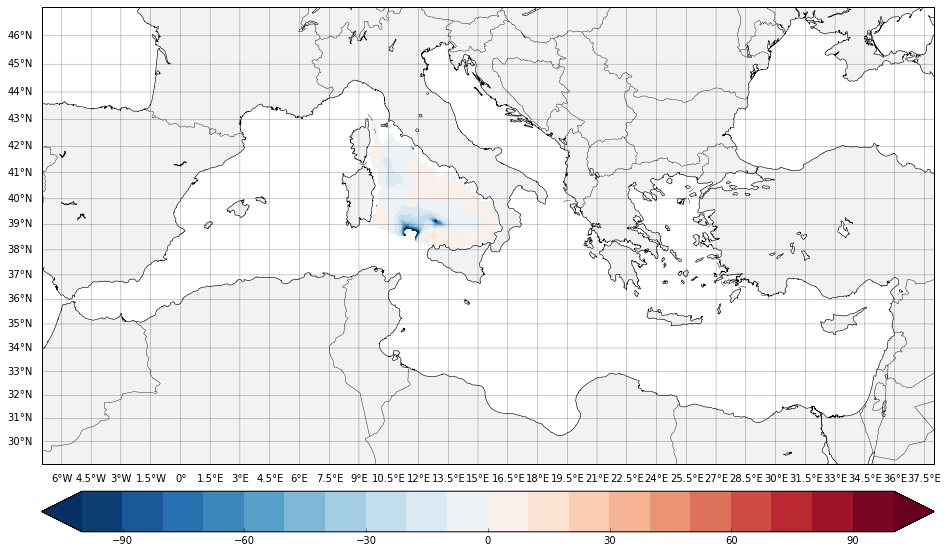

In [110]:
# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-100,110,10)
cs = m.contourf(xd,yd,nit_int150_negmask_TYR,cmap=plt.cm.RdBu_r, levels=levels, extend='both');
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

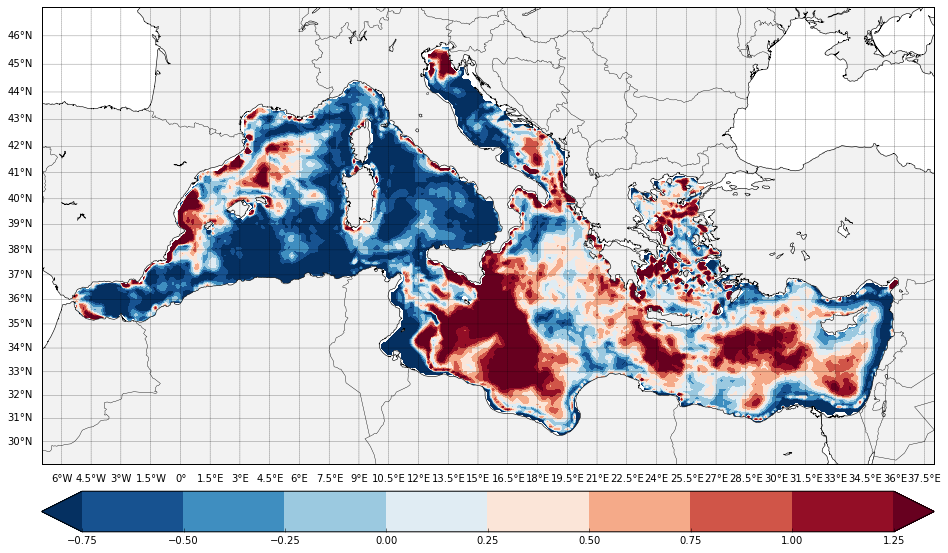

In [131]:
# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-0.75,1.5,0.25)
cs = m.contourf(xd,yd,stand_IAV_phyto,cmap=plt.cm.RdBu_r, levels=levels, extend='both');
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

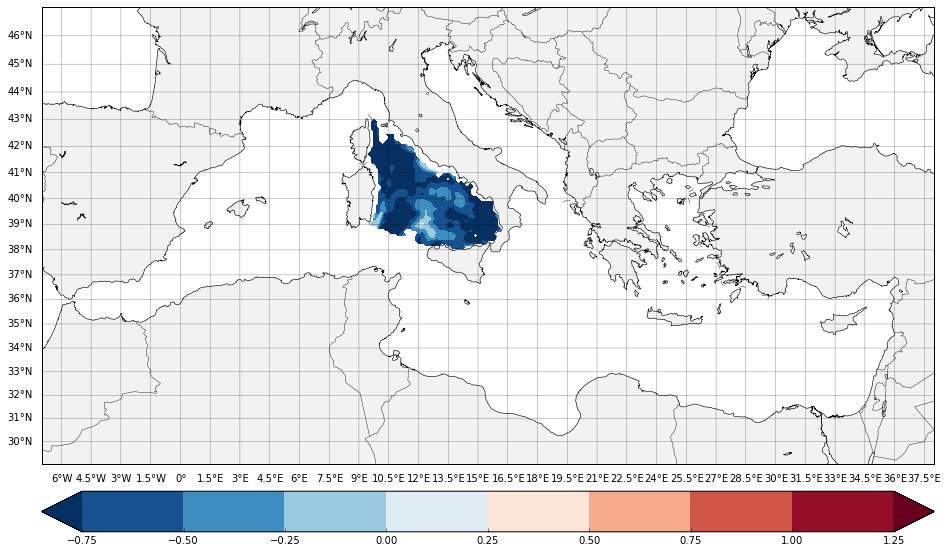

In [133]:
# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-100,110,10)
levels = np.arange(-0.75,1.5,0.25)
cs = m.contourf(xd,yd,phyto_TYR,cmap=plt.cm.RdBu_r, levels=levels, extend='both');
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

In [134]:
np.nanmean(phyto_TYR)

-0.76622975

In [125]:
tot_TYR

-5.6329336911439896

In [135]:
(-0.76622975/tot_TYR)*100

13.60267654498853

In [ ]:
# 20/05 End tests

In [66]:
# 19/05 Now for negative SUMIAV

In [137]:
# 19/05 POSITIVE CONTRIBUTIONS, new regions
# 14/05 correction erreur tot_+region
# 13/05 NEW VERIFS => ici on a contribs negatives et positives (contrairement precedemment)

# 16.04 -nit_sw ; Reorganizing regions
# Pourcentages +/- sur le positif, et figure
# 15.04 ALL CONTRIBUTIONS => REGIONAL MEANS
# Demarche en moy v2 - shorter output

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp']
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']

for phyvar in var_phy:
    vars()['contribs_'+phyvar] = np.zeros([len(region_list_new_reorg)])
i = 0

## 14.04 Regionalisation
for region in region_list_new_reorg:
    print "Region", region, ":"
    #print ' '
    for phyvar in var_phy:
        # Creating corresponding variable names
        temp = vars()['stand_IAV_'+phyvar]
        temp = np.ma.masked_where(bathy<200,temp)
        temp = np.ma.masked_where(lon_t<-5.5,temp)
    
        # Defining the coordinates
        if region == 'NWMED':
            y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                    41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                    39.247095, 46.4938123, 44.4124705]
            x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                    9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                    -1.17747, 5.2446879, 10.1001797]
        elif region == 'ALB_ALG':
            y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
            x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9, 3.994854] # 9.90934876
        elif region == 'TYR':
            y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                    39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                    41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
            x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                    16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                    9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
        elif region == 'CMED':
            y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
            x = [8.92564455, 9, 10, 15, 15, 13.3111744311976] # 9.90934876
        elif region == 'ADR':
            y = [40.138887,39.746050,43,43]
            x = [18.343058,20.052826,20.052826,13]
        elif region == 'N_ION':
            y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                    40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
            x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                    16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
        elif region == 'S_ION':
            y = [37,29.658354,30.941890,31.924008, #37.503355
                    37.001816]
            x = [21.936077,20.090485,15.297679,15.081913,15.084801]
        elif region == 'EMED':
            y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 37.180585,30.329515,29.658354]
            x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 37.441401,35.238352,20.090485]
        elif region == 'AEG':
            y = [43,39.746050,37.503355,37,35.335479,35.045582,35.478996,36.113327,40.879240]
            x = [20.052826,20.052826,21.936077,21.936077,23.620988,26.217209,27.159167,28.006273,30.504893]
        elif region == 'GOL':
            y = [43.5,43.5,41,41]
            x = [3,6.5,6.5,3]
        else:
            print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

        # Selecting the data
        vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
        path = Path(vertices, codes=None, closed=True);
        indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                        transform=None, radius=0.0)
        indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone

        # doing a map
        data_to_plot = np.ma.masked_where(bathy<200,temp)
        data_to_plot = np.ma.masked_where(sum_corr>=0,data_to_plot) # WHERE SUM NEGATIVE
        data_to_plot = np.ma.masked_array(data_to_plot,indices_re==False)
        vars()[phyvar+'_'+region] = data_to_plot
        
        vars()['tot_'+region] = 0
        
    for phyvar in var_phy:
        if np.nanmean(vars()[phyvar+'_'+region])<0:
            vars()['tot_'+region] = vars()['tot_'+region] + np.nanmean(vars()[phyvar+'_'+region])
    
    for phyvar in var_phy:
        #i = 0
        #vars()['contribs_'+phyvar] = np.zeros([len(var_phy)])
        #if np.nanmean(vars()[phyvar+'_'+region])>0:
            #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_+region'])*100
            #print "contrib", phyvar, "=", vars()['contrib_'+phyvar+'_'+region], "%"
            
        #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/np.nanmean(vars()['correl_'+region]))*100
        vars()['contribs_'+phyvar][i] = np.round((np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_'+region])*100, decimals=2)
        print phyvar, "=", np.round(vars()['contribs_'+phyvar][i],decimals=2), "%"
    i += 1
    
    #print ' '
    #print '---'
    print ' '

Region ALB_ALG :
nit_int150 = -12.94 %
phyto = 34.88 %
netppb = -4.63 %
UptNitsurf = 11.34 %
UptAmmoSur = 24.57 %
bactc = 10.38 %
zoo = 3.92 %
graz = -11.1 %
exp_poc200 = 9.17 %
exp_doc200 = 5.74 %
resp = -14.05 %
 
Region TYR :
nit_int150 = -2.09 %
phyto = 13.6 %
netppb = 11.77 %
UptNitsurf = 17.07 %
UptAmmoSur = 14.7 %
bactc = 8.94 %
zoo = 8.44 %
graz = 4.1 %
exp_poc200 = 6.22 %
exp_doc200 = 5.5 %
resp = 9.64 %
 
Region CMED :
nit_int150 = -5.59 %
phyto = 7.95 %
netppb = 13.76 %
UptNitsurf = -0.36 %
UptAmmoSur = 26.66 %
bactc = 12.94 %
zoo = 10.98 %
graz = 7.99 %
exp_poc200 = 7.92 %
exp_doc200 = 1.78 %
resp = 10.02 %
 
Region S_ION :
nit_int150 = -6.17 %
phyto = -1.85 %
netppb = -4.96 %
UptNitsurf = 18.97 %
UptAmmoSur = 15.24 %
bactc = 23.21 %
zoo = 11.7 %
graz = 4.49 %
exp_poc200 = 14.82 %
exp_doc200 = 11.57 %
resp = -2.06 %
 
Region EMED :
nit_int150 = 6.07 %
phyto = -4.28 %
netppb = 18.24 %
UptNitsurf = 7.66 %
UptAmmoSur = 13.23 %
bactc = -2.59 %
zoo = 10.02 %
graz = 26.8 %
exp_po

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in less


In [138]:
# doing positive vectors

for phyvar in var_phy:
    vars()['temp_'+phyvar] = vars()['contribs_'+phyvar]

In [139]:
# doing  positive vectors

for phyvar in var_phy:
    temp = vars()['temp_'+phyvar]
    vars()['pos_contribs_'+phyvar] = temp    
    vars()['pos_contribs_'+phyvar][vars()['pos_contribs_'+phyvar]<0] = 0

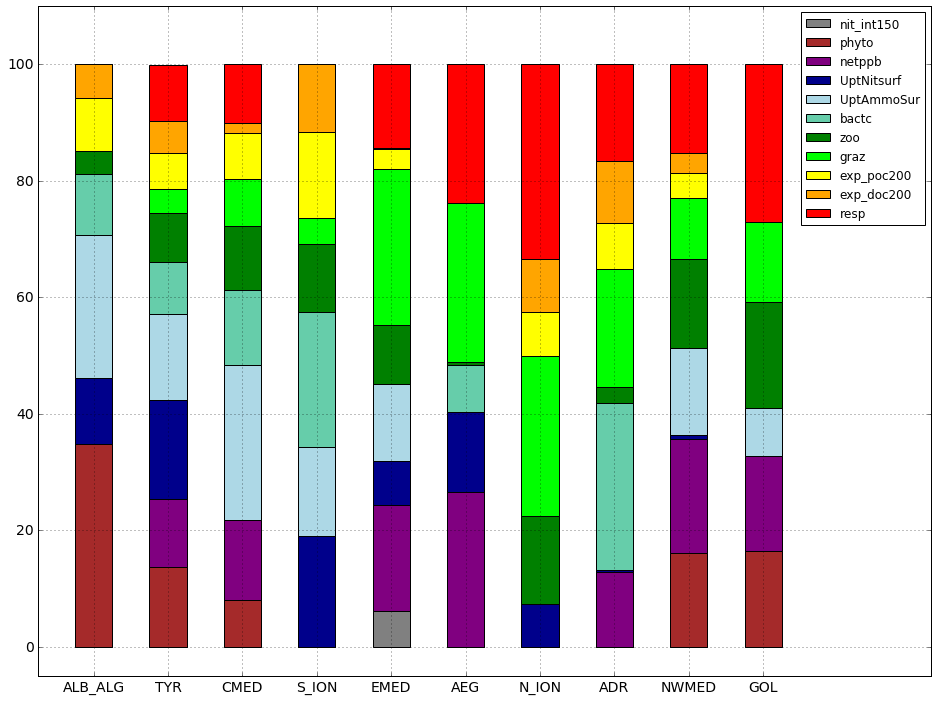

In [140]:
# 19/05 Only positive contribs on positive sum corr
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']

fig, ax = plt.subplots(figsize=(16,12))
N = len(region_list_new_reorg)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

#p0 = plt.bar(ind,pos_contribs_nit_sw, width,color='k')

#p1 = plt.bar(ind,pos_contribs_nit_int150, width,bottom=pos_contribs_nit_sw,color='grey')
p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')

plt.xticks(ind, region_list_new_reorg)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-5,110])
plt.xlim([-0.5,11.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)
#var_phy3 = ['nit_sw', 'nit_int150', 'phyto', 'netpp']
#plt.legend((p0[0], p1[0], p2[0], p3[0]), var_phy3)

In [142]:
# 19/05 Now doing negative vectors
# 14/05 correction erreur tot_+region
# 13/05 NEW VERIFS => ici on a contribs negatives et positives (contrairement precedemment)

# 16.04 -nit_sw ; Reorganizing regions
# Pourcentages +/- sur le positif, et figure
# 15.04 ALL CONTRIBUTIONS => REGIONAL MEANS
# Demarche en moy v2 - shorter output

var_phy = ['nit_int150', 'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 
           'exp_doc200', 'resp']
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']

for phyvar in var_phy:
    vars()['contribs_'+phyvar] = np.zeros([len(region_list_new_reorg)])
i = 0

## 14.04 Regionalisation
for region in region_list_new_reorg:
    print "Region", region, ":"
    #print ' '
    for phyvar in var_phy:
        # Creating corresponding variable names
        temp = vars()['stand_IAV_'+phyvar]
        temp = np.ma.masked_where(bathy<200,temp)
        temp = np.ma.masked_where(lon_t<-5.5,temp)
    
        # Defining the coordinates
        if region == 'NWMED':
            y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                    41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                    39.247095, 46.4938123, 44.4124705]
            x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                    9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                    -1.17747, 5.2446879, 10.1001797]
        elif region == 'ALB_ALG':
            y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
            x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9, 3.994854] # 9.90934876
        elif region == 'TYR':
            y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                    39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                    41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
            x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                    16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                    9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
        elif region == 'CMED':
            y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
            x = [8.92564455, 9, 10, 15, 15, 13.3111744311976] # 9.90934876
        elif region == 'ADR':
            y = [40.138887,39.746050,43,43]
            x = [18.343058,20.052826,20.052826,13]
        elif region == 'N_ION':
            y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                    40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
            x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                    16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
        elif region == 'S_ION':
            y = [37,29.658354,30.941890,31.924008, #37.503355
                    37.001816]
            x = [21.936077,20.090485,15.297679,15.081913,15.084801]
        elif region == 'EMED':
            y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 37.180585,30.329515,29.658354]
            x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 37.441401,35.238352,20.090485]
        elif region == 'AEG':
            y = [43,39.746050,37.503355,37,35.335479,35.045582,35.478996,36.113327,40.879240]
            x = [20.052826,20.052826,21.936077,21.936077,23.620988,26.217209,27.159167,28.006273,30.504893]
        elif region == 'GOL':
            y = [43.5,43.5,41,41]
            x = [3,6.5,6.5,3]
        else:
            print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

        # Selecting the data
        vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
        path = Path(vertices, codes=None, closed=True);
        indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                        transform=None, radius=0.0)
        indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone

        # doing a map
        data_to_plot = np.ma.masked_where(bathy<200,temp)
        data_to_plot = np.ma.masked_where(sum_corr>=0,data_to_plot)
        data_to_plot = np.ma.masked_array(data_to_plot,indices_re==False)
        vars()[phyvar+'_'+region] = data_to_plot
        
        vars()['tot_'+region] = 0
        
    for phyvar in var_phy:
        if np.nanmean(vars()[phyvar+'_'+region])<0:
            vars()['tot_'+region] = vars()['tot_'+region] + np.nanmean(vars()[phyvar+'_'+region])
    
    for phyvar in var_phy:
        #i = 0
        #vars()['contribs_'+phyvar] = np.zeros([len(var_phy)])
        #if np.nanmean(vars()[phyvar+'_'+region])>0:
            #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_+region'])*100
            #print "contrib", phyvar, "=", vars()['contrib_'+phyvar+'_'+region], "%"
            
        #vars()['contrib_'+phyvar+'_'+region] = (np.nanmean(vars()[phyvar+'_'+region])/np.nanmean(vars()['correl_'+region]))*100
        vars()['contribs_'+phyvar][i] = np.round((np.nanmean(vars()[phyvar+'_'+region])/vars()['tot_'+region])*100, decimals=2)
        print phyvar, "=", np.round(vars()['contribs_'+phyvar][i],decimals=2), "%"
    i += 1
    
    #print ' '
    #print '---'
    print ' '

Region ALB_ALG :
nit_int150 = -12.94 %
phyto = 34.88 %
netppb = -4.63 %
UptNitsurf = 11.34 %
UptAmmoSur = 24.57 %
bactc = 10.38 %
zoo = 3.92 %
graz = -11.1 %
exp_poc200 = 9.17 %
exp_doc200 = 5.74 %
resp = -14.05 %
 
Region TYR :
nit_int150 = -2.09 %
phyto = 13.6 %
netppb = 11.77 %
UptNitsurf = 17.07 %
UptAmmoSur = 14.7 %
bactc = 8.94 %
zoo = 8.44 %
graz = 4.1 %
exp_poc200 = 6.22 %
exp_doc200 = 5.5 %
resp = 9.64 %
 
Region CMED :
nit_int150 = -5.59 %
phyto = 7.95 %
netppb = 13.76 %
UptNitsurf = -0.36 %
UptAmmoSur = 26.66 %
bactc = 12.94 %
zoo = 10.98 %
graz = 7.99 %
exp_poc200 = 7.92 %
exp_doc200 = 1.78 %
resp = 10.02 %
 
Region S_ION :
nit_int150 = -6.17 %
phyto = -1.85 %
netppb = -4.96 %
UptNitsurf = 18.97 %
UptAmmoSur = 15.24 %
bactc = 23.21 %
zoo = 11.7 %
graz = 4.49 %
exp_poc200 = 14.82 %
exp_doc200 = 11.57 %
resp = -2.06 %
 
Region EMED :
nit_int150 = 6.07 %
phyto = -4.28 %
netppb = 18.24 %
UptNitsurf = 7.66 %
UptAmmoSur = 13.23 %
bactc = -2.59 %
zoo = 10.02 %
graz = 26.8 %
exp_po

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in less


In [143]:
# 19/05 Now doing negative vectors

for phyvar in var_phy:
    vars()['tempneg_'+phyvar] = vars()['contribs_'+phyvar]

In [144]:
for phyvar in var_phy:
    temp = vars()['tempneg_'+phyvar]
    vars()['neg_contribs_'+phyvar] = temp
    
    vars()['neg_contribs_'+phyvar][vars()['neg_contribs_'+phyvar]>=0] = 0

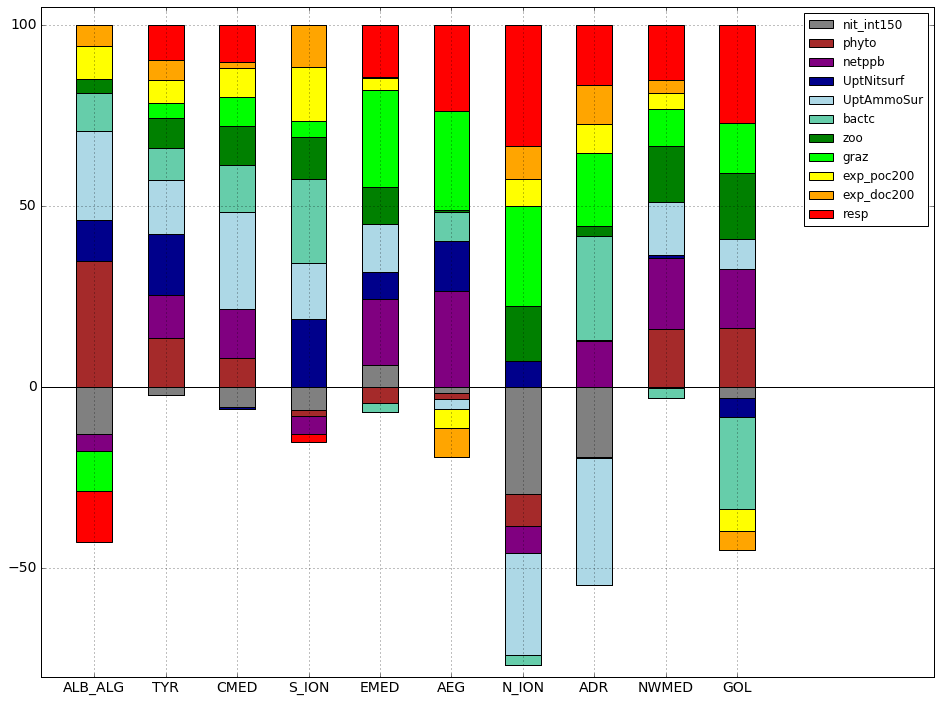

In [147]:
# 19/05 Positive and negative contributions in POSITIVE SUM CORR regions
# 14/05 New try positive and negative contribs - nit_sw
# Test positive contribs
region_list_new_reorg = ['ALB_ALG', 'TYR', 'CMED', 'S_ION', 'EMED', 'AEG', 'N_ION', 'ADR', 'NWMED', 'GOL']

fig, ax = plt.subplots(figsize=(16,12))
N = len(region_list_new_reorg)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
i = 0

p1 = plt.bar(ind,pos_contribs_nit_int150, width,color='grey')
plt.bar(ind,neg_contribs_nit_int150, width,color='grey')

p2 = plt.bar(ind,pos_contribs_phyto, width,bottom=pos_contribs_nit_int150,color='brown')
plt.bar(ind,neg_contribs_phyto, width,bottom=neg_contribs_nit_int150,color='brown')

p3 = plt.bar(ind,pos_contribs_netppb, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto,
             color='purple')
plt.bar(ind,neg_contribs_netppb, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto,
             color='purple')

p4 = plt.bar(ind,pos_contribs_UptNitsurf, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb,color='darkblue')
plt.bar(ind,neg_contribs_UptNitsurf, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb,color='darkblue')

p5 = plt.bar(ind,pos_contribs_UptAmmoSur, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf,color='lightblue')
plt.bar(ind,neg_contribs_UptAmmoSur, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf,color='lightblue')

p6 = plt.bar(ind,pos_contribs_bactc, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur,color='mediumaquamarine')
plt.bar(ind,neg_contribs_bactc, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur,color='mediumaquamarine')

p7 = plt.bar(ind,pos_contribs_zoo, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc,color='green')
plt.bar(ind,neg_contribs_zoo, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc,color='green')

p8 = plt.bar(ind,pos_contribs_graz, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo,color='lime')
plt.bar(ind,neg_contribs_graz, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo,color='lime')

p9 = plt.bar(ind,pos_contribs_exp_poc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz,color='yellow')
plt.bar(ind,neg_contribs_exp_poc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz,color='yellow')

p10 = plt.bar(ind,pos_contribs_exp_doc200, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200,color='orange')
plt.bar(ind,neg_contribs_exp_doc200, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200,color='orange')

p11 = plt.bar(ind,pos_contribs_resp, width,bottom=pos_contribs_nit_int150+pos_contribs_phyto+
             pos_contribs_netppb+pos_contribs_UptNitsurf+pos_contribs_UptAmmoSur+pos_contribs_bactc+
             pos_contribs_zoo+pos_contribs_graz+pos_contribs_exp_poc200+pos_contribs_exp_doc200,color='red')
plt.bar(ind,neg_contribs_resp, width,bottom=neg_contribs_nit_int150+neg_contribs_phyto+
             neg_contribs_netppb+neg_contribs_UptNitsurf+neg_contribs_UptAmmoSur+neg_contribs_bactc+
             neg_contribs_zoo+neg_contribs_graz+neg_contribs_exp_poc200+neg_contribs_exp_doc200,color='red')

plt.plot(np.arange(-1,13,1),np.zeros([len(ind)+4]), '-', color='k', linewidth=1)

plt.xticks(ind, region_list_new_reorg)
ax.set_xticks(ind + width / 2)
plt.grid()
plt.ylim([-80,105])
plt.xlim([-0.5,12])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), var_phy)